In [879]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from warnings import filterwarnings
filterwarnings('ignore')

sns.set_style('darkgrid')

In [880]:
data = pd.read_excel("AFES- DATA REMOB.COLLECTION EXX..xlsx")
df = data.copy()

In [881]:
df.head(5)

,Timestamp,Email Address,Enumerator's Name,Respondent's Name,Age,Sex,Marital status,Do you have children?,"If yes, how many children do you have?",Do you have any form of disability?,...,Have you heard about the Kofkro project? Yes/No,"If yes, where did you hear about it?",What are your interests or hobbies?,What do you think are the biggest challenges facing youth in your community?,How do you think those challenges in your community can be solved?,Is there anything else you would like to share about yourself or your community?,Would you like to be part of youth centered activities in your community?,Are you willing to be contacted for future follow-up?,Do you have any question or suggestion?,If you have any suggestions or recommendations? kindly indicate.
0,2024-10-07 05:37:09.368,NaN,Francis Adu-Amankwah,Francis,31-35,Male,Maried,Yes,3,No,...,Yes,AFES Ghana's Koforidua Youth Manifesto Project...,Research,Youth unemployment,Creating more job opportunities,NaN,NaN,NaN,NaN,Thank you
1,2024-10-08 17:14:02.165,NaN,NaN,Tttt,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-08 19:24:48.496,francisaduamankwah8@gmail.com,Francis,Owusua,31-35,Female,Maried,Yes,3,No,...,Yes,During the Koforidua Manifesto Launch,Reading,unemployment,creating more entrepreneurship opportunities,no,Yes,Yes,No,NaN
3,2024-10-08 20:33:12.461,tinadankyi@gmail.com,NaN,Tttt,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-08 21:52:52.980,henriettaaddoquaye4@gmail.com,Henrietta Addo_quaye,Loyola Addo_quaye,15- 20,Female,Single,No,NaN,No,...,No,NaN,Reading,Sanitation issues,By engaging in communal labour,Several cases of teenage pregnancy,Yes,Yes,No,NaN


In [882]:
df.columns

Index(['Timestamp', 'Email Address', 'Enumerator's Name', 'Respondent's Name',
       'Age', 'Sex', 'Marital status', 'Do you have children? ',
       'If yes, how many children do you have?',
       'Do you have any form of disability?',
       'If yes,  Please specify the type of disability',
       'Educational Status: Which of these categories do you belong?',
       'If you have attended school in the past, what's the highest level you attained?',
       'If you are currently schooling, which level are you?',
       'Where do you spend most part of your day?',
       'Where do you sleep at night?',
       'Where do you currently reside in Koforidua? (Specify area/ community) [Old Estate West]',
       'Where do you currently reside in Koforidua? (Specify area/ community) [Old Estate East]',
       'Where do you currently reside in Koforidua? (Specify area/ community) [Nyamekrom]',
       'Where do you currently reside in Koforidua? (Specify area/ community) [Railway station B]',
 

In [883]:
df.isnull().sum()

Timestamp                                                                               0
Email Address                                                                        2466
Enumerator's Name                                                                       8
Respondent's Name                                                                       0
Age                                                                                    12
                                                                                     ... 
 Is there anything else you would like to share about yourself or your community?    1766
Would you like to be part of youth centered activities in your community?              72
Are you willing to be contacted for future follow-up?                                  83
Do you have any question or suggestion?                                               157
If you have any suggestions or recommendations? kindly indicate.                     2662
Length: 81

In [884]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()  # Remove leading and trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace('[^\w\s]', '', regex=True)  # Remove non-alphanumeric characters
    .str.replace('\s+', '_', regex=True)  # Replace spaces with underscores
)


print(df.columns)

Index(['timestamp', 'email_address', 'enumerators_name', 'respondents_name',
       'age', 'sex', 'marital_status', 'do_you_have_children',
       'if_yes_how_many_children_do_you_have',
       'do_you_have_any_form_of_disability',
       'if_yes_please_specify_the_type_of_disability',
       'educational_status_which_of_these_categories_do_you_belong',
       'if_you_have_attended_school_in_the_past_whats_the_highest_level_you_attained',
       'if_you_are_currently_schooling_which_level_are_you',
       'where_do_you_spend_most_part_of_your_day',
       'where_do_you_sleep_at_night',
       'where_do_you_currently_reside_in_koforidua_specify_area_community_old_estate_west',
       'where_do_you_currently_reside_in_koforidua_specify_area_community_old_estate_east',
       'where_do_you_currently_reside_in_koforidua_specify_area_community_nyamekrom',
       'where_do_you_currently_reside_in_koforidua_specify_area_community_railway_station_b',
       'where_do_you_currently_reside_in_ko

In [885]:

df = df.drop(['timestamp', 'email_address', 'enumerators_name', 'respondents_name'], axis=1)

In [886]:

df = df.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'marital_status': 'MaritalStatus',
    'do_you_have_children': 'HasChildren',
    'if_yes_how_many_children_do_you_have': 'NumChildren',
    'do_you_have_any_form_of_disability': 'HasDisability',
    'if_yes_please_specify_the_type_of_disability': 'DisabilityType',
    'educational_status_which_of_these_categories_do_you_belong': 'EducationStatus',
    'if_you_have_attended_school_in_the_past_whats_the_highest_level_you_attained': 'HighestEducationLevel',
    'if_you_are_currently_schooling_which_level_are_you': 'CurrentEducationLevel',
    'where_do_you_spend_most_part_of_your_day': 'DayLocation',
    'where_do_you_sleep_at_night': 'NightLocation',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_old_estate_west': 'Residence_OldEstateWest',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_old_estate_east': 'Residence_OldEstateEast',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_nyamekrom': 'Residence_Nyamekrom',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_railway_station_b': 'Residence_RailwayStation',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_nsukwao_abotanso': 'Residence_NsuakwoAbotanso',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_tanoso': ' Residence_Tanoso',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_nsukwaoso': 'Residence_Nsukwaoso',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_osabene_mile_50': 'Residence_OsabeneMile_50',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_adweso_estate': 'Residence_AdwesoEstate',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_adweso_town': 'Residence_AdwesoTown',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_two_streams': 'Residence_TwoStreams',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_nyerede_north': 'Residence_NyeredeNorth',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_nyerede_south':'Residence_NyeredeSouth',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_oguaa': 'Residence_Oguaa',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_residential_area':'Residence_ResidentialArea',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_sempoamiensa':'Residence_Sempoamiensa',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_ohemaa_park':'Residence_OhemaaPark',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_adontua': 'Residence_Adontua',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_school_town':'Residence_SchoolTown',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_anglican':'Residence_Anglican',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_asuofiriso':'Residence_Asuafiriso',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_anlo_town_south': 'Residence_AnloTownSouth',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_anlo_town_north':'Residence_AnloTownNorth',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_central_hospital':'Residence_CentralHospital',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_klu_town_yaw_kyerema':'Residence_KluTownYawKyerema',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_social_welfare':'Residence_SocialWelfare',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_central_market':'Residence_CentralMarket',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_debrakrom':'Residence_Debrakrom',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_akwaasu_asebi':'Residence_AkwaasuAsebi',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_kantudu': 'Residence_Kantudu',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_new_zongo_community_ab':'Residence_NewZongo_AB',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_new_zongo_community_c':'Residence_NewZongo_C',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_new_zongo_community_d':'Residence_NewZongo_D',
    'where_do_you_currently_reside_in_koforidua_specify_area_community_ada':'Residence_Ada',
    '1_what_is_your_phone_number': 'PhoneNumber',
    'is_this_number_on_whatsapp': 'OnWhatsApp',
    'if_no_provide_the_number_on_whatsapp': 'WhatsAppNumber',
    'are_you_on_any_of_the_social_media_platforms': 'OnSocialMedia',
    'if_yes_which_of_them_select_as_many_as_applied': 'SocialMediaPlatforms',
    'what_is_your_email_address_if_applicable': 'EmailAddressOptional',
    'are_you': 'EmploymentStatus',
    'if_employed_what_is_the_nature_of_your_employment': 'EmploymentNature',
    'if_unemployed_are_you_searching_for_a_job': 'JobSearchStatus',
    'are_you_satisfied_with_your_employment_situation': 'EmploymentSatisfaction',
    'are_you_undergoing_any_training': 'UndergoingTraining',
    'if_yes_which_kind_of_training_are_you_undergoing_and_for_what_reason_are_you_being_trained': 'TrainingTypeAndReason',
    'do_you_have_access_to_some_basic_amenities': 'AccessToAmenities',
    'if_yes_which_of_the_following_do_you_have': 'AmenitiesType',
    'do_you_have_a_national_health_insurance_card': 'HasHealthInsurance',
    'do_you_have_a_voters_id_card': 'HasVotersID',
    'have_you_ever_voted_in_any_elections': 'VotedBefore',
    'do_you_plan_to_vote_in_the_upcoming_general_election': 'PlanToVote',
    'have_you_participated_in_any_town_hall_meeting_organized_by_the_assembly': 'TownHallParticipation',
    'have_you_ever_engaged_yourself_in_ay_community_development_activitycommunal_labour': 'CommunityActivity',
    'if_yes_please_specify_the_kind_of_activity': 'ActivityType',
    'have_you_heard_about_the_kofkro_project_yesno': 'HeardAboutKofkroProject',
    'if_yes_where_did_you_hear_about_it': 'SourceOfKofkroInfo',
    'what_are_your_interests_or_hobbies': 'InterestsOrHobbies',
    'what_do_you_think_are_the_biggest_challenges_facing_youth_in_your_community': 'CommunityChallenges',
    'how_do_you_think_those_challenges_in_your_community_can_be_solved': 'CommunityChallengesSolutions',
    'is_there_anything_else_you_would_like_to_share_about_yourself_or_your_community': 'AdditionalInfo',
    'would_you_like_to_be_part_of_youth_centered_activities_in_your_community': 'YouthActivityInterest',
    'are_you_willing_to_be_contacted_for_future_followup': 'FutureFollowupInterest',
    'do_you_have_any_question_or_suggestion': 'QuestionsOrSuggestions',
    'if_you_have_any_suggestions_or_recommendations_kindly_indicate': 'SuggestionsOrRecommendations'
    
})




In [887]:
df.head(5)

,Age,Gender,MaritalStatus,HasChildren,NumChildren,HasDisability,DisabilityType,EducationStatus,HighestEducationLevel,CurrentEducationLevel,...,HeardAboutKofkroProject,SourceOfKofkroInfo,InterestsOrHobbies,CommunityChallenges,CommunityChallengesSolutions,AdditionalInfo,YouthActivityInterest,FutureFollowupInterest,QuestionsOrSuggestions,SuggestionsOrRecommendations
0,31-35,Male,Maried,Yes,3,No,NaN,Currently attending,TERTIARY,NaN,...,Yes,AFES Ghana's Koforidua Youth Manifesto Project...,Research,Youth unemployment,Creating more job opportunities,NaN,NaN,NaN,NaN,Thank you
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31-35,Female,Maried,Yes,3,No,NaN,NaN,TERTIARY,NaN,...,Yes,During the Koforidua Manifesto Launch,Reading,unemployment,creating more entrepreneurship opportunities,no,Yes,Yes,No,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JHS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15- 20,Female,Single,No,NaN,No,NaN,Currently attending,SHS,SHS,...,No,NaN,Reading,Sanitation issues,By engaging in communal labour,Several cases of teenage pregnancy,Yes,Yes,No,NaN


In [888]:
df.describe().T

,count,unique,top,freq
Age,2920,9,21- 25,1079
Gender,2905,3,Male,1750
MaritalStatus,2908,2,Single,2656
HasChildren,2875,2,No,2396
NumChildren,490,34,1,145
...,...,...,...,...
AdditionalInfo,1166,426,No,546
YouthActivityInterest,2860,3,Yes,1982
FutureFollowupInterest,2849,3,Yes,1885
QuestionsOrSuggestions,2775,3,No,2430


In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932 entries, 0 to 2931
Data columns (total 77 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           2920 non-null   object
 1   Gender                        2905 non-null   object
 2   MaritalStatus                 2908 non-null   object
 3   HasChildren                   2875 non-null   object
 4   NumChildren                   490 non-null    object
 5   HasDisability                 2856 non-null   object
 6   DisabilityType                144 non-null    object
 7   EducationStatus               2844 non-null   object
 8   HighestEducationLevel         2218 non-null   object
 9   CurrentEducationLevel         1053 non-null   object
 10  DayLocation                   2831 non-null   object
 11  NightLocation                 2815 non-null   object
 12  Residence_OldEstateWest       135 non-null    object
 13  Residence_OldEstat

In [890]:
df['Age'].unique()

array(['31-35', nan, '15- 20', '21- 25', '26- 30', '15- 20, 21- 25',
       '15- 20, 26- 30', '21- 25, 26- 30', '21- 25, 31-35',
       '26- 30, 31-35'], dtype=object)

In [891]:
df['Age'] = df['Age'].str.replace(" ", "")

#  Handle multiple ranges
# Convert multiple ranges to a single range by taking the first one
df['Age'] = df['Age'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

#  Optionally, fill NaN with 'Unknown' or other placeholder
df['Age'] = df['Age'].fillna('Unknown')



In [892]:
df['Age'].unique()

array(['31-35', 'Unknown', '15-20', '21-25', '26-30'], dtype=object)

In [893]:
df['Gender'].unique()

array(['Male', nan, 'Female', 'Male, Female'], dtype=object)

In [894]:
##  Standardize multiple values to a single value, taking the first listed gender
df['Gender'] = df['Gender'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)

# Fill NaN values with 'Unknown' or another placeholder
df['Gender'] = df['Gender'].fillna('Unknown')


In [895]:
df['Gender'].unique()

array(['Male', 'Unknown', 'Female'], dtype=object)

In [896]:
df['MaritalStatus'].unique()

array(['Maried', nan, 'Single'], dtype=object)

In [897]:
df['HasChildren'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [898]:
df['NumChildren'].unique()

array([3, nan, 'One', 'Two', 'I dont', 'One ', 5, 2, 'Zero', 1, 'None ',
       'Three', 'One Child', 'Non', 4, 'No children ', 'Two ', 0, '0ne',
       'Tow', 'Threee', '( 1 ) one ', 'Four', 'No ', 'Six', 'Three ',
       'Four ', 'one', 'TWO', 'One daughter ', 7, 6, 'Can’t disclose ',
       'Not yet', 'ONE'], dtype=object)

In [899]:
#  Define a dictionary to map textual numbers to integers
text_to_num = {
    'zero': 0, 'none': 0, 'no': 0, 'not yet': 0, 'no children': 0, 'i dont': 0, 'non': 0,
    'one': 1, '1': 1, '(1) one': 1, 'one child': 1, 'one daughter': 1, '0ne': 1, 'ONE': 1,
    'two': 2, 'tow': 2, 'two ': 2, 'TWO': 2,
    'three': 3, 'threee': 3, 'three ': 3,
    'four': 4, 'four ': 4,
    'five': 5,
    'six': 6,
    'seven': 7
}

# Clean the data
# Convert all values to lowercase and strip whitespace
df['NumChildren'] = df['NumChildren'].astype(str).str.strip().str.lower()

# Map text values to numbers
df['NumChildren'] = df['NumChildren'].replace(text_to_num)

# Handle non-numeric and irrelevant entries
# Convert entries that could not be mapped to a number to NaN
df['NumChildren'] = pd.to_numeric(df['NumChildren'], errors='coerce')

# Step 4: Optionally, fill NaN with 0 or another placeholder (which mean 'no children')
df['NumChildren'] = df['NumChildren'].fillna(0)

In [900]:
df['NumChildren'].unique()

array([3., 0., 1., 2., 5., 4., 6., 7.])

In [901]:
df['HasDisability'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [902]:
df['DisabilityType'].unique()

array([nan, 'Physically Challenged (Hands and Legs)', 'Visual impairment',
       'Psychological/mental disorder', 'Hearing impairment', 'Albinism',
       'Speech impairment', 'Hearing impairment, Speech impairment',
       'Speech impairment, Psychological/mental disorder',
       'Physically Challenged (Hands and Legs), Hearing impairment'],
      dtype=object)

In [903]:
#  Replace NaN with a placeholder ('None')
df['DisabilityType'] = df['DisabilityType'].fillna('None')

# : Standardize terms: strip extra spaces, and lowercase the text
df['DisabilityType'] = df['DisabilityType'].str.strip().str.lower()

# : Standardize terms based on predefined mapping
standard_disabilities = {
    'physically challenged (hands and legs)': 'Physical Disability',
    'visual impairment': 'Visual Impairment',
    'psychological/mental disorder': 'Mental Disorder',
    'hearing impairment': 'Hearing Impairment',
    'albinism': 'Albinism',
    'speech impairment': 'Speech Impairment'
}



# Replace each disability type with the standardized name
df['DisabilityType'] = df['DisabilityType'].apply(lambda x: standard_disabilities.get(x, x))


# #  Split entries that contain multiple disabilities and flatten the list
# df['DisabilityType'] = df['DisabilityType'].apply(lambda x: x.split(', ') if ', ' in x else [x])
df['DisabilityType'].value_counts()

# df['DisabilityType'] = df['DisabilityType'].apply(cleaaaa)

# Flatten and remove duplicates
# flattened_disabilities = [disability for sublist in df['DisabilityType'] for disability in sublist]
# cleaned_disabilities = list(set(flattened_disabilities))

# Print the cleaned unique disability types
# print(cleaned_disabilities)
# df['DisabilityType'].value_counts()

DisabilityType
none                                                          2788
Physical Disability                                             39
Hearing Impairment                                              31
Visual Impairment                                               24
hearing impairment, speech impairment                           23
Mental Disorder                                                  9
Albinism                                                         8
Speech Impairment                                                7
speech impairment, psychological/mental disorder                 2
physically challenged (hands and legs), hearing impairment       1
Name: count, dtype: int64

### CLEANING _DayLocation_ FEATURE

In [904]:
df['DayLocation'] = df['DayLocation']
missing_vals = df['DayLocation'].isna().sum()

print(f"There are {missing_vals} missing values in this feature")

# Removing whitespaces, recasting to lower case and removing all punctuations
df['DayLocation'] = df['DayLocation'].str.strip().str.lower().str.replace('[^\w\s]', '', regex=True)

# Filling the missing values with 'unknown' temporarily
df['DayLocation'].fillna('unknown', inplace=True)


print(f"Number of unique responses is {df['DayLocation'].nunique()}")

def cleaning_home_helper(val):
    if 'home' in val or 'house' in val:
        if 'home or school' in val or 'home pr on campus' in val or 'home or at school' in val or 'school and home' in val or 'at school and at home' in val:
            return 'home_or_school'
        if 'home or work' in val or 'work or home' in val or 'at work and at home' in val or 'work place snnit house' in val:
            return 'home_or_work'
        if 'house' in val or 'home' in val:
            return 'home'
    return val
        
    
# Generic cleaning function
def generic_cleaner(val, keyword, recoded):
    """
    Args:
        val (str): entry in dataset
        keyword (str): keyword to search for in val
        recoded (str): new word used to replace val

    Returns:
        str: recoded word
    """
    if keyword in val:
        return recoded
    return val        

There are 101 missing values in this feature
Number of unique responses is 322


In [905]:
### Cleaning for school
# for i in range(len(df['DayLocation'])):
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'scho', 'school') # recoding for school
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'cam', 'school') # For observations capture as campus
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'class', 'school') # For observations captured as classes
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'schiol', 'school')
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'all nations university', 'school')
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'learning', 'school')
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'leaning', 'school')
#     df['DayLocation'][i] = generic_cleaner(df['DayLocation'][i], 'sch', 'school')
    
    
day_location_dict = {
    'school': ['scho', 'cam', 'class', 'schiol', 'learning', 'leaning', 'sch'],
    'home': ['morovia', 'betom', 'asakore', 'srodae', 'yaw kyerema', 'adweso', 'asokore', 'trom', 'nkurakine', 'effiduase', 'betom riss', 'high way',
        'pentecosts area nyamekrom', 'jubilee park', 'yawkyerema', 'atekyem', 'snnit', 'nsukwao', 'nsukwao estate junction', 'koforidua', 'assciontion presby',
        'moronvia', 'galloway', 'agaveye', 'kassadjan', 'base', 'apenkwa', 'poly', 'asokorekoforidua', 'indoors', 'mile 50', 'residential area', 'railways', 
        'pipeline', 'kete krachi', 'old estate', 'apenkwa new site', 'monrovia', 'ada', 'kenkey factory', 'mallam park', 'old traffic', 'kasajan', 
        'sempoamiensa', 'drug lane', 'oguaa', 'room', 'anlo town', 'hime', 'normally spend time grandmom cos does what i love most', 'com',
        'are', 'fri',
    ],
    'workplace': ['wor', 'sho', 'most at the construction site', 'mar', 'at the makert', 'sto', 'woek', 'wok', 'sell', 'taxi driver', 'at the chopbar serving',
        'teaching', 'attachment', 'site', 'job', 'office', 'wo4', 'far', 'trading', 'nankese'],
    'worship_place': ['chu', 'mosq', 'singing'],
    'ghetto': ['ge', 'ghe', 'gator'],
    'street': ['str', 'roa', 'on the outdoors'],
    'hospital': ['hos', 'cli'],
    'town': ['tow', 'in the t', 'searching for a job' ],
    'station': ['stati', 'accra staion'],
    'library': ['lib'],
    'internet_cafe': ['caf', 'on the internet'],
    'bar': ['pub'],
    'game_center': ['game center', 'gaming centre', 'playing game'],
    'football_field': ['football field', 'at the peace', 'peace park', 'peer park', 'at the park', 'on the pitch', 'park' ],
    'hotel': ['hotel fun'],
    'betting_center': ['sporty bet centre'],
    'zongo': ['zon']
}
 
def day_location_cleaner(val):
    for grouping, locations in day_location_dict.items():
        if any(location in val for location in locations):
            return grouping
    return 'unknown'

df['DayLocation'] = df['DayLocation'].apply(day_location_cleaner)

print(f"Number of unique responses is {df['DayLocation'].nunique()}")

df['DayLocation'].unique()


Number of unique responses is 18


array(['home', 'unknown', 'town', 'school', 'workplace', 'game_center',
       'worship_place', 'football_field', 'street', 'ghetto', 'hospital',
       'library', 'station', 'internet_cafe', 'betting_center', 'hotel',
       'bar', 'zongo'], dtype=object)

### CLEANING _NightLocation_ FEATURE

In [906]:
# Removing whitespaces, recasting to lower case and removing all punctuations
df['NightLocation'] = df['NightLocation'].str.strip().str.lower().str.replace('[^\w\s]', '', regex=True)

# Filling the missing values with 'unknown' temporarily
df['NightLocation'].fillna('unknown', inplace=True)

print(f"Number of unique responses is {df['NightLocation'].nunique()}")

night_location_dict = {
    'home': ['kasajan', 'sempoamiensa', 'nsukwao', 'oguaa', 'betom', 'srodie', 'adweso', 'anlo town', 'klutown', 'apenkwa', 'abotanso', 'asokore', 'trom', 'oyoko', 'yawkyerema',
                    'klu town', 'bonya', 'alon town', 'ada', 'effiduase', 'kassadjan', 'korle', 'cantudu', 'major 1', 'nsukwa', 'old estate', 'klu town', 'yaw kyerema', 'two streams',
                    'pipeline', 'shadrak', 'anglo town', 'monrovia', 'moronvia', 'morovia', 'koforidua', 'effeduase prisons', 'nyamekrom', 'osabene', 'sorodae', 'atekyem',  'nankese',
                    'pantoase', 'yaw', 'mile 50', 'srodae', 'agata', 'estate', 'mallam park', 'agartha', 'wanzam', 'agatha', 'agavenya', 'community', 'my area', 'areas',
                    'home', 'house', 'abode', 'parents place', 'room', 'residence', 'fri', 'parent', 'mum', 'mom', 'rented', 'bed', 'apartment',
                    'hone', 'perching', 'hom', 'homw', 'base'],
    'workplace': ['wor', 'at my shop', 'close late in the night', 'veterans administration', 'sometimes in the farm'],
    'school': ['sch', 'host', 'camp', 'dormitory' ],
    'street': ['stree', 'road', 'sho', 'outside', 'market', 'town', 'total 4', 'uncomplete building', 'bula sport', 'park'],
    'station': ['stati'],
    'ghetto': [ 'ge', 'ghe'],
    'zongo': ['zo'],
    'worship_place': ['chu'],
    'hospital': ['hosp'],
    'internet_cafe': ['caf'],
    'gaming_centre': ['game center'],
    'bar': ['bar'],
    'hotel': ['hotel']
}


def night_location_cleaner(val):
    for grouping, locations in night_location_dict.items():
        if any(location in val for location in locations):
            return grouping
    return 'unknown'

df['NightLocation'] = df['NightLocation'].apply(night_location_cleaner)

print(f"Number of unique responses is {df['NightLocation'].nunique()}")
print(df['NightLocation'].unique())

Number of unique responses is 236
Number of unique responses is 14
['home' 'unknown' 'workplace' 'street' 'worship_place' 'ghetto' 'school'
 'zongo' 'bar' 'station' 'hospital' 'internet_cafe' 'gaming_centre'
 'hotel']


### _RESIDENCE_

In [907]:
residence_labs = []
residence_in_df = []

### Getting the indidual areas of residence
for ele in df.columns:
    if ele.startswith('Residence'):
        residence_labs.append(''.join(ele.split('_')[1:]))
        residence_in_df.append(ele)
        
###  Getting the count of the number of observations in each area of residence        
residence_Count_ = dict()
for i in range(len(residence_labs)):
    residence_Count_[residence_labs[i]] = df[df[residence_in_df[i]] == 'Column 2'].shape[0]
    
residence_Count_

{'OldEstateWest': 135,
 'OldEstateEast': 138,
 'Nyamekrom': 113,
 'RailwayStation': 48,
 'NsuakwoAbotanso': 104,
 'Nsukwaoso': 277,
 'OsabeneMile50': 79,
 'AdwesoEstate': 48,
 'AdwesoTown': 83,
 'TwoStreams': 84,
 'NyeredeNorth': 19,
 'NyeredeSouth': 12,
 'Oguaa': 109,
 'ResidentialArea': 194,
 'Sempoamiensa': 128,
 'OhemaaPark': 213,
 'Adontua': 4,
 'SchoolTown': 7,
 'Anglican': 41,
 'Asuafiriso': 33,
 'AnloTownSouth': 81,
 'AnloTownNorth': 41,
 'CentralHospital': 34,
 'KluTownYawKyerema': 239,
 'SocialWelfare': 75,
 'CentralMarket': 20,
 'Debrakrom': 15,
 'AkwaasuAsebi': 27,
 'Kantudu': 65,
 'NewZongoAB': 123,
 'NewZongoC': 99,
 'NewZongoD': 146,
 'Ada': 90}

In [908]:
df['OnWhatsApp'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [909]:
df['OnSocialMedia'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [910]:
df['SocialMediaPlatforms'].fillna('unknown', inplace=True)

def feature_filler(feature, value):
    if value in feature:
        return value
    else:
        return 'unknown'

### Creating new features for each of the social media platforms
all_fb, all_twitter, all_instagram, all_snapchat, all_tiktok = [], [], [], [], []
for i in range(df.shape[0]):
    all_fb.append(feature_filler(df['SocialMediaPlatforms'][i], 'Facebook'))
    all_twitter.append(feature_filler(df['SocialMediaPlatforms'][i], 'Tweeter'))
    all_instagram.append(feature_filler(df['SocialMediaPlatforms'][i], 'Instagram'))
    all_snapchat.append(feature_filler(df['SocialMediaPlatforms'][i], 'Snapchat'))
    all_tiktok.append(feature_filler(df['SocialMediaPlatforms'][i], 'Tiktok'))
    
df['SocialMediaPlatforms_Facebook'] = all_fb
df['SocialMediaPlatforms_Twitter'] = all_twitter
df['SocialMediaPlatforms_Instagram'] = all_instagram
df['SocialMediaPlatforms_Snapchat'] = all_snapchat
df['SocialMediaPlatforms_Tiktok'] = all_tiktok

### NB: In the newly created features, 'unknown' denotes missing values.

### Dropping the SocialMediaPlatforms feature
df.drop(labels=['SocialMediaPlatforms'], axis=1, inplace=True)


In [911]:
df['EmploymentStatus'].unique()

array(['Self-employed', nan, 'Unemployed', 'Employed'], dtype=object)

### CLEANING _EmploymentNature_ FEATURE

In [912]:
print(f"The number of unique values is {df['EmploymentNature'].nunique()}")

df['EmploymentNature'].fillna('unknown', inplace=True)

# Removing whitespaces, recasting to lower case and removing all punctuations
df['EmploymentNature'] = df['EmploymentNature'].str.strip().str.lower().str.replace('[^\w\s]', '', regex=True)

employment_nature_dict = {
    'adminstrator': ['adm'],
    'fashion_designing/cloth_making': [
        'fashion', 'seam', 'tail', 'tay', 'seems'
    ],
    'sales': [
        'trad', 'sal', 'sel', 'vend', 'momo', 'market woman', 'shop', 'att', 'dea', 'del', 'mob', 'hawk', 'sto', 'working at filling station for someone',
        'business', 'bout', 'pharmacy counter assistant', 'doing of spaghetti', 'working for someone at filling stations', 'cos', 'kfc', 'roaster',
        'game center', 'supplier', 'buyer', 'provisions'
    ],
    'teaching': ['tea', 'early stage'],
    'engineering': ['eng'],
    'civil_servant': ['gov', 'civ', 'electoral commission ghana', 'work at electricity', 'mil', 'pol', 'municipal  assembly','cocobod',
        'prisons officer', 'extension officer', 'records officer', 'office work', 'work with lands commission', 'lott', 
        'environmental protection agency', 'lab at intravenous', 'ncce', 'nya'
    ],
    'health_worker': ['nur', 'health', 'heath worker', 'doc', 'med', 'anaesthesia assistance', 'hos'],
    'masonry': ['mas', 'const', 'work under someone by day', 'til' ],
    'rendering_of_service': ['fit', 'mech', 'ren', 'hai', 'barb', 'kay', 'beau', 'makeup', 'plum', 'elect', 'cle', 'dj', 'servi', 'house keeping',
            'school laboure', 'bouncer at soccerbet', 'labour work', 'rece', 'nss', 'hotel', 'wai', 'house help', 'nail technician',
            'wash', 'cooking', 'helping travelers carry their luggages', 'load', 'kitchen assistant', 'zoom', 'interpreter', 'pop', 'roof', 'disc',
            'laundry', 'glazing', 'mtn', 'tele', 'key cutting', 'fixing of glass', 'weld', 'shoe', 'caterer', 'sprayer', 'porter', 'potter', 'printing',
            'guest house', 'repair', 'glass man', 'decorations', 'working under someone', 'working in a chop bar', 'advisor', 'secretary', 
            'mourtary manager', 'qnet', 'matron', 'hardware technician', 'fuel station supervisor',
    ],
    'human_resource_manager': ['human resource manager'],
    'manufacturing': ['stee', 'alu', 'manu', 'blo', 'ben','water', 'production', 'producing raw materials for a company'],
    'machinery_operator': ['ope'],
    'carpentry': ['carp', 'cap'],
    'driving': ['dri', 'rid'],
    'farming': ['far', 'fam'],
    'painting': ['paint'],
    'baking': ['bak', 'pas'],
    'banking': ['ban', 'loans officer', 'fina', 'susu', 'loan', 'credit', 'cashier'],
    'graphic_designing/photography': ['grap', 'video editor'],
    'marketing': ['mar'],
    'accounting': ['acc', 'aco'],
    'security': ['secu'],
    'real_estate': ['real'],
    'rearing': ['rea', 'bree'],
    'it_expert': ['compu', 'it person', 'disc jockey and it personnel'],
    'training': ['schooling'],
    'employed_unspecified': ['full time', 'regular', 'at work', 'blas', 'private formal', 'company work', 'm'],
    'unemployed': ['not employed yet']
}

def employment_nature_cleaner(val):
    for grouping, employments in employment_nature_dict.items():
        if any(employment in val for employment in employments):
            return grouping
    return 'unknown'

df['EmploymentNature'] = df['EmploymentNature'].apply(employment_nature_cleaner)

print(f"The number of unique values is {df['EmploymentNature'].nunique()}")

df['EmploymentNature'].unique()


The number of unique values is 543
The number of unique values is 28


array(['unknown', 'fashion_designing/cloth_making',
       'rendering_of_service', 'teaching', 'sales',
       'employed_unspecified', 'civil_servant', 'engineering', 'banking',
       'manufacturing', 'security', 'masonry',
       'graphic_designing/photography', 'carpentry', 'farming',
       'painting', 'training', 'driving', 'health_worker', 'baking',
       'it_expert', 'marketing', 'rearing', 'machinery_operator',
       'human_resource_manager', 'real_estate', 'adminstrator',
       'accounting'], dtype=object)

In [913]:
df['JobSearchStatus'].unique()

array(['No', nan, 'Yes', 'Maybe'], dtype=object)

In [914]:
df['EmploymentSatisfaction'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [915]:
df['UndergoingTraining'].unique()

array(['No', nan, 'Maybe', 'Yes'], dtype=object)

### cleaning training type and reason  

In [916]:
df['AccessToAmenities'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [917]:
df['AmenitiesType'].unique()

array(['Running /portable water, Electricity, Toilet facility, School, Hospital',
       nan, 'Electricity',
       'Running /portable water, Electricity, School, Hospital', 'School',
       'Hospital', 'Electricity, Toilet facility, School, Hospital',
       'Running /portable water, Electricity, Hospital',
       'Electricity, Toilet facility, Hospital',
       'Running /portable water, Electricity, Toilet facility',
       'Running /portable water',
       'Running /portable water, Electricity, Toilet facility, Hospital',
       'Running /portable water, Electricity', 'Electricity, Hospital',
       'Running /portable water, Electricity, Toilet facility, School',
       'Electricity, Toilet facility',
       'Running /portable water, Electricity, School',
       'Electricity, School, Hospital',
       'Electricity, Toilet facility, School', 'Toilet facility',
       'Running /portable water, Hospital',
       'Running /portable water, Toilet facility',
       'Running /portable wate

#### cleaning amenitiestype 


In [918]:


# Replace NaN with "No amenities"
df['AmenitiesType'] = df['AmenitiesType'].fillna('No amenities')

# Define standard names for amenities to replace variations
standard_amenities = {
    'Running /portable water': 'Water',
    'Electricity': 'Electricity',
    'Toilet facility': 'Toilet Facility',
    'School': 'School',
    'Hospital': 'Hospital'
}

# Clean each cell by:
# - Splitting by comma
# - Stripping whitespace
# - Standardizing each amenity using the dictionary
# - Removing duplicates within each row

def clean_amenities(cell):
    # If the cell contains 'No amenities', return it as a list
    if cell == 'No amenities':
        return [cell]
    else:
        # Split by commas and strip any surrounding whitespace
        amenities = cell.split(',')
        # Standardize amenities using the dictionary
        standardized = [standard_amenities.get(amenity.strip(), amenity.strip()) for amenity in amenities]
        # Remove duplicates and return as a list
        return list(set(standardized))

# Apply the cleaning function
df['CleanedAmenities'] = df['AmenitiesType'].apply(clean_amenities)

# Convert each list to a comma-separated string to make it hashable
df['CleanedAmenitiesStr'] = df['CleanedAmenities'].apply(lambda x: ', '.join(x))

# Get unique values from the new column
unique_amenities = df['CleanedAmenitiesStr'].unique()

# Print the cleaned amenities in the desired format
for amenity in unique_amenities:
    for standard_amenity in amenity.split(', '):
        print(f"'{standard_amenity}':")

'Electricity':
'School':
'Water':
'Toilet Facility':
'Hospital':
'No amenities':
'Electricity':
'Electricity':
'Hospital':
'School':
'Water':
'School':
'Hospital':
'Toilet Facility':
'Electricity':
'School':
'Hospital':
'Electricity':
'Hospital':
'Water':
'Toilet Facility':
'Electricity':
'Hospital':
'Toilet Facility':
'Electricity':
'Water':
'Water':
'Toilet Facility':
'Electricity':
'Hospital':
'Water':
'Electricity':
'Water':
'Electricity':
'Hospital':
'Toilet Facility':
'Electricity':
'School':
'Water':
'Toilet Facility':
'Electricity':
'Electricity':
'School':
'Water':
'Electricity':
'School':
'Hospital':
'Toilet Facility':
'Electricity':
'School':
'Toilet Facility':
'Hospital':
'Water':
'Toilet Facility':
'Water':
'Toilet Facility':
'Hospital':
'School':
'Water':
'Toilet Facility':
'School':
'Hospital':
'Electricity':
'School':
'School':
'Hospital':
'Toilet Facility':
'School':
'Water':
'School':
'Water':
'Toilet Facility':
'Hospital':
'Toilet Facility':
'Hospital':
'Water':
'Toi

In [919]:
df['HasHealthInsurance'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [920]:
df['HasVotersID'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [921]:
df['VotedBefore'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [922]:
df['PlanToVote'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [923]:
df['TownHallParticipation'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [924]:
df['CommunityActivity'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

#### Activitytype 

In [925]:
df['ActivityType'].unique()

array(['Community development ', nan, 'distilling of gutters',
       'Community health walk ', 'Clean up', 'Communal labour ',
       'Cleaning the gaters', 'Monthly cleaning of the community ',
       'Sweeping ', 'It was a sanitation project ', 'Clean up exercise ',
       'Cleaning the gutters and other staff', 'Distilled gutter ',
       'General cleanup ', 'Fixing of road', 'Comminual labour',
       'Cleaning up the community ', 'cleaning dirty gutters in town',
       'Cleaning ', 'Cleaning of road side ', 'Cleaning up',
       'Cleaning of roadside ', 'Cleaning of road ', 'Town cleaning ',
       'Cleaning of gutters ', 'Clean up ',
       'Weeding and cleaning of bush areas', 'Communal labour',
       'Clearing of bushy roads ', 'Road constraction',
       'Cleaning of choked gutters and sweeping the township ',
       'Desilting and clearing of weeds in my community',
       'Dredging of Gutter ',
       'Weeding around and doing the community roads ',
       'Keeping the en

In [926]:
#  Fill NaN values with a placeholder if needed
df['ActivityType'] = df['ActivityType'].fillna('No Activity')

# : Define standard terms to map variations
standard_activities = {
    'cleanup': [
        'Clean up', 'Clean up exercise', 'General cleanup', 'Cleaning up', 
        'Cleanup exercise', 'Cleaning of the community', 'Community clean up', 
        'Environmental clean up exercise', 'Town clean up', 'Community cleaning',
        'Sanitation day', 'Monthly cleaning of the community', 'End of year clean up exercise',
        'Clean-up', 'Cleanup activities', 'Community cleanup', 'Cleaning the community', 
        'Community clean-up', 'Clean up the environment', 'Environmental cleaning', 
        'Street cleaning', 'Organized cleanup', 'Gutters cleaning', 'Clean-up exercise',
        'Public cleaning', 'Community-wide cleaning'
    ],
    'weeding': [
        'Weeding', 'Clearing of bushy areas', 'Clearing of bushes', 
        'Clearing bushes in the community', 'General weeding', 
        'Weeding and cleaning', 'Weeding bushy places', 'Weeding and clearing', 
        'Weeding roadside', 'Bush clearing', 'Weeding and burning', 
        'Weeding and spraying', 'Weeding of roadsides', 'Weeding in the fields', 
        'Filling of weeding holes', 'Grass cutting', 'Grass clearing', 'Removing weeds', 
        'Clearing of weeds', 'Removing unwanted grass', 'Weeding in the community', 
        'Weeding and controlling erosion', 'Cleaning and weeding', 'Bush and grass cutting'
    ],
    'road_repair': [
        'Fixing of road', 'Road construction', 'Filling of potholes', 
        'Filling potholes', 'Road potholes filling', 'Filling of portholes',
        'Filling pot holes', 'Filling port holes', 'Construction of roads', 
        'Fixing bad roads', 'Repairing roads', 'Resurfacing roads', 'Pothole repair',
        'Fixing road damage', 'Repairing road potholes', 'Fixing the road', 'Maintenance of roads',
        'Road repairs', 'Repairing damaged roads', 'Filling of pothole areas', 'Filling cracks in roads',
        'Resurfacing damaged roads'
    ],
    'sanitation': [
        'Cleaning the environment', 'Cleaning the gutters', 'Cleaning', 'Sweeping',
        'Draining of gutters', 'Cleaning of gutters', 'Gutter distillation', 
        'Distilling gutters', 'Distilled gutter', 'Cleaning up the community',
        'Sanitation', 'General cleaning', 'Environmental cleaning', 'Waste disposal',
        'Waste collection', 'Trash removal', 'Clearing of litter', 'Removal of waste',
        'Sanitary cleaning', 'Cleaning up', 'Garbage collection', 'Garbage removal',
        'Street cleaning', 'Clearing of waste', 'Sanitation work', 'Cleaning the streets', 
        'Cleaning the market', 'Public sanitation', 'Waste management', 'Cleaning drains',
        'Clearing blocked gutters', 'Rubbish collection', 'Street sweeping', 'Drainage maintenance'
    ],
    'health_walk': [
        'Health walk', 'Walking for health', 'Sanitation walk', 
        'Community health walk', 'Health and fitness walk', 'Health exercise',
        'Walk for health', 'Walking exercise', 'Public health walk', 'Exercise walk', 
        'Walking for fitness', 'Wellness walk', 'Community health exercise', 'Morning walk',
        'Public health awareness walk', 'Community fitness walk', 'Health campaign walk'
    ],
    'community_work': [
        'Community work', 'Community service', 'Volunteering', 'Community development',
        'Community mobilization', 'Helping the community', 'Community outreach', 
        'Helping in the community', 'Community improvement', 'Community engagement',
        'Voluntary service', 'Community assistance', 'Service to the community',
        'Supporting community initiatives', 'Community projects', 'Community service activity',
        'Community building', 'Neighborhood service', 'Social service'
    ],
    'education_programme': [
        'Education program', 'Training', 'Community education', 'Skill training', 
        'Community teaching', 'Educational activities', 'Community outreach education',
        'Public education', 'Training for development', 'Public awareness program', 
        'Educational outreach', 'Skill development program', 'Youth education',
        'Workshops and training', 'Awareness program', 'Community education program'
    ]
}

#  Function to standardize activities
def standardize_activity(activity):
    # Loop through the dictionary to check if the activity matches any of the defined terms
    for category, activities in standard_activities.items():
        if any(activity.strip().lower() in a.lower() for a in activities):
            return category  # Return the category if it matches
    return 'Other'  # Return 'Other' if no match is found

#  Apply the function to your DataFrame column
df['Standardized_Activity'] = df['ActivityType'].apply(standardize_activity)

#  Filter out "Other" or any unwanted categories
df_filtered = df[df['Standardized_Activity'] != 'Other']

#  View the unique standardized categories
df_filtered['Standardized_Activity'].unique()

array(['community_work', 'health_walk', 'cleanup', 'sanitation',
       'road_repair', 'weeding'], dtype=object)

In [927]:
df['HeardAboutKofkroProject'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [928]:
df['SourceOfKofkroInfo'].unique()

array(["AFES Ghana's Koforidua Youth Manifesto Project launch ", nan,
       'During the Koforidua Manifesto Launch', 'Radio',
       'A friend told me ', 'A friend ', 'From a friend ',
       'A friend told me about it ', 'From Meldad',
       'My brother told me more about that ',
       'I heard the Kofkro is a special project made for the youth to speak on their behalf and also assist them in decision making ',
       'A friend', "No I haven't ", "It's an NGO ", 'Television ',
       'A friend invited me to one of your programs ', '@town',
       'On radio ', 'Friend', 'At the library center ',
       'My friend spoke about it to me ', 'Koforidua Library ',
       'From a Member of youth Advisory Co',
       'My friends had been attending it ', 'At a program ',
       'I heard it from one of my brothers ', 'A Friend ',
       'My sister attended program with them', 'In my community ', 'F',
       'Through a friend ', 'From a friend',
       'From one of these questionnaires', 'From

In [929]:
# Replace NaN with "Unknown" or "No information"
df['SourceOfKofkroInfo'] = df['SourceOfKofkroInfo'].fillna('No information')

# Standardize variations of sources

standard_sources = {
    'friend': 'Friend',
    'a friend': 'Friend',
    'from a friend': 'Friend',
    'my friend': 'Friend',
    'from meldad': 'Meldad',
    'from my brother': 'Brother',
    'brother': 'Brother',
    'sister': 'Sister',
    'radio': 'Radio',
    'television': 'Television',
    'whatsapp': 'WhatsApp',
    'social media': 'Social Media',
    'afes program': 'AFES Program',
    'afes programs': 'AFES Program',
    'afes meetings': 'AFES Program',
    'youth program': 'Youth Program',
    'youth projects': 'Youth Program',
    'youth advocacy': 'Youth Advocacy',
    'assembly member': 'Assembly Member',
    'from a youth advisory member': 'Youth Advisory Council',
    'from a colleague': 'Colleague',
    'from the internet': 'Internet',
    'from radio': 'Radio',
    'from a program': 'Program',
    'from advertisement': 'Advertisement',
    'from a friend of mine': 'Friend',
    'from a member of youth advisory co': 'Youth Advisory Council',
    'from a customer': 'Customer',
    'from a sister': 'Sister',
    'from a YAC member': 'Youth Advisory Council',
    'from a youth advisory council member': 'Youth Advisory Council',
    'assembly man': 'Assembly Member',
    'from a program': 'Program',
    'from a meeting': 'Meeting',
    'from other meetings': 'Other Meetings',
    'online': 'Online',
    'at town': 'Town',
    'at workplace': 'Workplace',
    'at library center': 'Library',
    'in town': 'Town',
    'from a float': 'Float',
    'media': 'Media',
    'star-gh capacity building': 'Star-GH',
    'advertisement': 'Advertisement',
    'afes program': 'AFES Program',
    'afes programs': 'AFES Program',
    'youth programme': 'Youth Program',
    'youth project': 'Youth Project',
    'youth advocacy project': 'Youth Advocacy Project',
    'youth projects': 'Youth Program',
    'from a brother': 'Brother',
    'youth advocacy': 'Youth Advocacy',
    'youth advocacy project': 'Youth Advocacy Project',
    'from an NGO': 'NGO',
    'from same meet': 'Same Meet',
    'from friends': 'Friends',
    'from a good friend': 'Friend',
    'a school mate': 'School Mate',
    'from a youth advisory council': 'Youth Advisory Council',

}

# Function to clean and standardize the sources
def clean_sources(cell):
    # Convert to lower case and check if the source matches any defined standard
    for variant, standard in standard_sources.items():
        if variant.lower() in cell.lower():
            return standard
    return 'Other'  # If no match found, return 'Other'

# Apply the cleaning function
df['CleanedSource'] = df['SourceOfKofkroInfo'].apply(clean_sources)

# Get unique cleaned sources
unique_sources = df['CleanedSource'].unique()

# Print the cleaned sources
print(unique_sources)

['Other' 'Radio' 'Friend' 'Meldad' 'Brother' 'Television'
 'Youth Advisory Council' 'Sister' 'Advertisement' 'Workplace' 'Town'
 'Colleague' 'Customer' 'Assembly Member' 'Star-GH' 'AFES Program' 'Media'
 'Youth Advocacy' 'Program' 'Youth Program' 'Same Meet' 'Social Media'
 'School Mate' 'Other Meetings' 'NGO' 'Youth Project' 'Online']


In [930]:
df['InterestsOrHobbies'].unique()

array(['Research ', nan, 'Reading', 'Like  watching football ',
       'Cooking ', 'Watching a movie ', 'Braiding ',
       'Listening to music and reading ', 'Listen to music ', 'Reading ',
       'Football', ' music and dancing', 'Playing basketball ',
       'Football ', 'Dance', 'I love listening to music ', 'nails making',
       'Reading novels', 'Programming', 'Arts', 'Singing and dancing ',
       'Music, movies, working and sleeping ', 'Watching Football ',
       'Drumming,and playing games ', 'Singing and Reading ',
       'Work and fun',
       "I'm much interested in reading but I admit singing and dancing as hobbies ",
       'Reading of books and music ', 'Music and roaming', 'Music ',
       'Listening to preaching’s ', 'Music', 'To become an electrician ',
       'Playing video games and research ', 'Singing',
       'Listening to music', 'Serving my clients ', 'Playing Football',
       'Watching football ', 'Football and acting ', 'Music and work ',
       'Automobil

In [931]:
# Replace NaN with "Unknown" or "No information"
df['InterestsOrHobbies'] = df['InterestsOrHobbies'].fillna('No hobbies')

# Standardize variations of hobbies
standard_hobbies = {
    'reding': 'reading',
    'mudic': 'music',
    'fooball': 'football',
    'tv games': 'video games',
    'hobbie': 'hobby',
    'gamming': 'gaming',
    'soccer': 'football',
    'playing football and tv games': 'playing football',
    'playimg': 'playing',
    'studing': 'studying',
    'dancingno': 'dancing',
    'tv games ': 'video games',
    'game': 'gaming',
    'football or into sports': 'football',
    'tv games': 'video games',
    'learning a skill': 'learning',
    'watching of football': 'watching football',
    'play sporty': 'playing sports',
    'playing aviator': 'playing games',
    'tenisball': 'tennis ball',
    'play tennis ball': 'playing tennis',
    'work out': 'working out',
    'laughing with my peers': 'laughing',
    'hockey and handball': 'hockey, handball',
    'online games': 'playing online games',
    'doing music': 'playing music',
    'using of phone': 'using phone',
    'fixing of things': 'fixing things',
    'game play': 'gaming',
    'creating content': 'content creation',
    'p\n \nplaying football games': 'playing football games',
    'fixing electrical machines': 'fixing electrical machines',
    'playing draft': 'playing draft games',
    'fixing electrical': 'fixing electrical items',
    'researching': 'doing research',
    'tv games and music': 'video games and music',
    'tv games and movies': 'video games and movies',
    'watching tictok': 'watching TikTok',
    'listening to gospel music': 'listening to gospel',
    'listening to sports news': 'listening to sports radio',
    'no interest': 'no hobbies',
    'watching korean series': 'watching Korean series',
    'playing table tennis': 'playing ping pong',
    'watching football match': 'watching football',
    'watching movie': 'watching movies',
    'listening of music': 'listening to music',
    'cooking, singing and sports': 'cooking, singing, sports',
    'listening to radio': 'listening to the radio',
    'playing mobile games': 'playing mobile games',
    'painting and gaming': 'painting and gaming',
    'playing Fifa on computers': 'playing FIFA on computer',
    'playing instruments': 'playing musical instruments',
    'watching of football, reading of books and listening of music': 'watching football, reading books, listening to music',
    'watching football march': 'watching football matches',
}

# Function to clean and standardize the hobbies
def clean_hobbies(cell):
    # Convert to lower case and check if the hobby matches any defined standard
    for variant, standard in standard_hobbies.items():
        if variant.lower() in cell.lower():
            return standard
    return 'Other'  # If no match found, return 'Other'

# Apply the cleaning function
df['CleanedHobbies'] = df['InterestsOrHobbies'].apply(clean_hobbies)

# Get unique cleaned hobbies
unique_hobbies = df['CleanedHobbies'].unique()

# Print the cleaned hobbies
print(unique_hobbies)


['Other' 'hobby' 'gaming' 'video games' 'playing draft games'
 'watching movies' 'football' 'watching football' 'playing games'
 'playing' 'fixing electrical machines' 'playing sports' 'laughing'
 'listening to sports radio' 'playing musical instruments'
 'watching Korean series' 'playing music' 'doing research'
 'content creation' 'dancing' 'using phone' 'playing tennis' 'working out'
 'learning' 'cooking, singing, sports' 'listening to gospel' 'tennis ball'
 'listening to the radio' 'listening to music' 'fixing things'
 'watching football matches' 'no hobbies' 'playing ping pong' 'reading'
 'watching TikTok' 'music']


### Cleaning the _CommunityChallenges_

In [932]:
df['CommunityChallenges'].fillna('unknown', inplace=True)

print(f"The number of unique values is {df['CommunityChallenges'].nunique()}")

df['CommunityChallenges'] = df['CommunityChallenges'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)

challenges_dict = {
    'social_amenities_PoorRoads/Bridges': [
        'road', 'bridge', 'trans', 'potholes'
    ],
    'social_amenities_sanitation': [
        'sanitation', 'danitstion problem', 'wast', 'filtering around the community', 'pollu',
        'bad drainage system', 'improper disposal of garbage', 'dump site situated just behind a school',
        'dirt'
    ],
    'social_amenities_water_challenges': [
        'water', 'pipe'
    ],
    'PWDs_challenges': [
        'discri', 'stig', 'special needs support and inclusion', 'lack of community engagement and participation especially with deaf people',
        'no support for handicap in the community', 'unfriendly terrain'
        
    ],
    'social_amenities_toilet_challenges': [
        'toilet'
    ],
    'social_amenities_lightening': [
        'light'
    ],
    'social_amenities_accommodation': [
        'accom', 'sleep'
    ],
    'social_amenities_electricity': [
        'elec'
    ],
    'social_amenities_health': [
        'hos', 'health'
    ],
    'teenage_pregnancy': [
        'teen', 'early', 'child marriage'
    ],
    'theft': [
        'robb', 'thief', 'steal', 'stilling', 'rubbery', 'theft', 'high crime rate',
        'increase in crime rate', 'there is an increase in social vices among the youth leading to appalling incidences',
        
    ],
    'fraudulent_activities': [
        'fraud', 'scam', 'frude'
    ],
    'ghetto_lifestyle': [
        'getto',  'ghet'
    ],
    'environmental_flooding': [
        'flood'
    ],
    'drug/alcohol_abuse': [
        'drug', 'smo', 'shisha', 'subs', 'alcohol', 'opening of a new pub near the road side allowing the youth to buy all kind of stuffs there',
        
    ],
    'social_media_influence': [
        'media'
    ],
    'peer_pressure': [
        'peer', 'pressure'
    ],
    'lack_of_quality_education': [
        'edu', 'sch', 'leaning material', 'library', 'few classrooms', 'i c t facilities',
        'illiteracy', 'illetrate', 'inadequate social life education and mentorship',
        'overcrowding of students in various schools', 'there are no buses in my school',
        'there are no buses for students'
    ],
    'security': [
        'secu'
    ],
    'poor_leaders': [
        'leader'
    ]
    ,
    'inflation': [
        'high prices of goods and services', 'inflation', 'expen', 'high cost of living',
        'high standard of living'
    ],
    'financial_challenges': [
        'finan', 'poverty', 'hardship', 'lack of purpose due to economic uncertainty', 'hard economy',
        'salary', 'money', 'wages', 'hunger', 'hardship in the economy'
    ],
    'low_youth_participation_in_decision_making': [
        'decision', 'ineffective', 'youth voices are not heard in my community',
        'inability to exercise their right', 'should be given the chance to express their views in political firm',
        'lack of youth participation'
        
    ],
    'inadequate_skills_training': [
        'skill', 'limited opportunities for hands -on learning', 'traini', 'limited networking and mentorship'
    ],
    'entrepreneurship_challenges': [
        'entre'
    ],
    'lack_of_support': [
        'support', 'capital', 'neglect by government', 'money to establish their on jobs'
        'loans to expand business'
    ],
    'lack_of_recreational_facilities': [
        'foot', 'pitches', 'few sports facilities', 'recreational', 'lack of astro turf', 'lack of playing ground',
        'less entertainment centre'
    ],
    'poor_network_connections': [
        'internet', 'network issue', 'poor network connection', 'very poor network', 'bad network connection',
        'bad network'
    ],
    'promiscuity': [
        'pros', 'sex'
    ],
    'gambling': [
        'gamb', 'bett'
    ],
    'unemployment': [
        'unemploy', 'job', 'un employment', 'good works', 'laz', 'working issues', 'work issues',
        'uneployment', 'communal work activities', 'lack of basic employment opportunities', 'work', 'employment'
    ]
}

def challenges_cleaner(val):
    for grouping, challenges in challenges_dict.items():
        if any(challenge in val for challenge in challenges):
            return grouping
    return 'unknown'
    
df['CommunityChallenges'] = df['CommunityChallenges'].apply(challenges_cleaner)

print(f"The number of unique values is {df['CommunityChallenges'].nunique()}")

df['CommunityChallenges'].unique()


The number of unique values is 1023
The number of unique values is 32


array(['unemployment', 'unknown', 'social_amenities_sanitation',
       'teenage_pregnancy', 'social_amenities_water_challenges',
       'social_amenities_PoorRoads/Bridges', 'lack_of_quality_education',
       'security', 'social_amenities_toilet_challenges', 'gambling',
       'drug/alcohol_abuse', 'financial_challenges', 'promiscuity',
       'peer_pressure', 'lack_of_support',
       'lack_of_recreational_facilities', 'PWDs_challenges', 'theft',
       'social_amenities_electricity', 'social_amenities_health',
       'poor_leaders', 'ghetto_lifestyle', 'social_amenities_lightening',
       'inadequate_skills_training', 'fraudulent_activities',
       'social_media_influence', 'social_amenities_accommodation',
       'environmental_flooding', 'poor_network_connections', 'inflation',
       'entrepreneurship_challenges',
       'low_youth_participation_in_decision_making'], dtype=object)

### Cleaning _CommunityChallengesSolutions_

In [933]:
df['CommunityChallengesSolutions'].fillna('unknown', inplace=True)

df['CommunityChallengesSolutions'] = df['CommunityChallengesSolutions'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)

solution_dict = {
    'creation_of_jobs/good_conditions': [
        'job', 'emp', 'indus', 'work', 'fact', 'busin', 'compan', 'oppor', 'creating', 'government should create more',
        'they should pay good salary in private sector', 'more facilities should be build through government'
    ],
    'provision_of_quality/affordable_education/awareness_creation': [
        'aware', 'edu', 'adv', 'couns', 'sensi', 'teac', 'sch', 'lear', 'lean', 'if information would widely be spread about teenage pregnancy',
        'sex', 'libra', 'councelling', 'discr', 'gui', 'provision of buses',
        'the young girls should me more careful', 'government should provide  more desk', 'provision of buses for students',
        'the girls now a days should take their time and be careful', 'approach the individual',
        
    ],
    'sanctions_on_drug/alcohol_abuse': [
        'drug', 'subs', 'weed', 'government should put restrictions on it', 'by closing down all that place', 'put a band on it if possible',
        'limit them', 'a complete ban on certain applications', 'drive with cousions dont drink and drive',
        'doctors must proscribe meds before they sell', 'arrest', 'pharmacys should also stop selling unpriscribe medds',
        'by take measures to ttackly the situation'
    ],
    'rehabilitation': [
        'rehab'
    ],
    'construction_of_roads/bridges/drainages/boreholes': [
        'const', 'fix', 'bore', 'road', 'transpo', 'providing proper streets', 'drain'
    ],
    'proper_sanitation': [
        'clean', 'communal', 'distilling our gutters', 'sani', 'wast', 'dust', 'bins', 'organizing of comminual labour',
        'i think they should provide more containers', 'there are no recycling beene in the environment', 'resources the zoomlayon',
        'more beens must be provide', 'organize of comminual labour'
    ],
    'increasing_cybersecurity': ['arresting all potential scammers', 'cybers'],
    'improving_security_measure': [
        'secu', 'police', 'thef'
    ],
    'training_and_skills_acquisition': [
        'train', 'skill', 'vocat', 'appren', 'tvet', 'mento', 'talent retention programs', 'coming up with experiential programs',
        
    ],
    'good_leadership': [
        'lead', 'corru', 'governance', 'off', 'better government system', 'better system', 'through proper government policies',
        'change of government'
    ],
    'affordable_accomodation': [
        'government should build a place at an affordable rent to pwds', 'they should provide affordable accommodation',
        'availability of accommodation for street children', 'ensuring the availability of accommodation'
    ],
    'gambling_control': [
        'gamb', 'betti'
    ],
    'involvement_in_decision_making': [
        'decis', 'community', 'developing a shared vision', 'by them being themselves',
        'by knowing ourselves', 'everyone must do their best', 'everyone should be careful',
        'government should take our demands into consideration', 'by respecting each others view in the you',
        
    ],
    'enforcing_the_law': ['law', 'rule', 'enfor', 'innovative'],
    'provision_of_street_light': ['light'],
    'provision_of_support': [
        'fina', 'loan', 'mone', 'capi', 'support', 'aid', 'help', 'assista', 'need',
        'provision of them', 'actually it depends on the government i think the government should know how to control all this problems',
        'unless the government come in a solve', 'through the government and private institutions',
        'the government should come in', 'the government should get involved in this', 'the government should involve',
        'government must rise up and look into solving these problems', 'providing', 'our mp should provide', 'from government provide',
        'by pumping monies not the system', 'increase access to funding and resources', 'put measure in place to control the situation',
        'fund', 'through government', 'government should push those with talent higher', 'involving the government',
        'unless the government come in', 'government should provide', 'through the mp', 'government provide',
    ],
    'encourage_entrepreneurship': ['entre', 'creative', ],
    'support_from_assembly': ['assem', 'authori', 'municipal'],
    'good_parental_control': [
        'parent', 'restricting teenagers in using smart phones', 'families should know how to control their children',
        'families should be responsible'
    ],
    'provision_of_quality_health_care/infrastructure': [
        'health', 'clinic', 'hosp', 'government must build more laboratory'
    ],
    'access_to_water': [
        'water', 'polytank for every house'
    ],
    'better_economy': ['economy', 'proper economic conditions in the country'],
    'improve_telecommunication': ['communication', 'internet'],
    'youth_development': ['youth'],
    'low_cost_of_living': [
        'moderate', 'expens', 'by cutting down the cost of items which are increased every week',
        'by government cutting down the rate at which prices are shooting up', 'by government solving the situation on inflation',
        
    ],
    'providing_accessible_amenities': [
            'toilet', 'social', 'providing it', 'providing them'
        ],
    'provision_of_recreational_facilities': [
        'putting up astroturfs', 'ensuring the availability of playing grounds', 'it is the duty of the mce to provide us turf for better sports'

    ]
    
}

tpy = df['CommunityChallengesSolutions'].copy()

def solutions_cleaner(val):
    for grouping, solutions in solution_dict.items():
        if any(solution in val for solution in solutions):
            return grouping
    return 'unknown'

df['CommunityChallengesSolutions'] = df['CommunityChallengesSolutions'].apply(solutions_cleaner)
#

df['CommunityChallengesSolutions'].unique()

array(['creation_of_jobs/good_conditions', 'unknown', 'proper_sanitation',
       'provision_of_quality/affordable_education/awareness_creation',
       'provision_of_support', 'involvement_in_decision_making',
       'improving_security_measure', 'providing_accessible_amenities',
       'support_from_assembly', 'provision_of_street_light',
       'sanctions_on_drug/alcohol_abuse',
       'construction_of_roads/bridges/drainages/boreholes',
       'training_and_skills_acquisition', 'good_leadership',
       'youth_development', 'better_economy',
       'provision_of_recreational_facilities', 'enforcing_the_law',
       'good_parental_control',
       'provision_of_quality_health_care/infrastructure',
       'access_to_water', 'affordable_accomodation', 'gambling_control',
       'low_cost_of_living', 'increasing_cybersecurity',
       'improve_telecommunication', 'rehabilitation',
       'encourage_entrepreneurship'], dtype=object)

### Cleaning _AdditionalInfo_

In [934]:
df['AdditionalInfo'].fillna('unknown', inplace=True)

df['AdditionalInfo'] = df['AdditionalInfo'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)

additional_info_dict = {
    'lack_of_social_amenities': [
        'water', 'social amenities', 'light', 'road', 'toilet', 'clinic', 'lack of healthcare facilities', 'we want our street bulbs to work regularly',
        
    ],
    'education_challenges': [
        'sch', 'illiteracy', 'edu'
    ],
    'training/skills_acquisition': [
        'learn', 'train', 'skill', 'am interested in apprenticeship programme'
    ],
    'unemployment': [
        'emp', 'job', 'unemp', 'work has become scared for us', 'i can work at a stationary point', 'we lack infrastructures and work',
        'the youth dont like working', 'struggling within the youth is too much in terms of earning money'
    ],
    'drug/alcohol_abuse': [
        'drug', 'alco', 'subs', 'smo'
    ],
    'sanitation': [
        'sani', 'clean', 'waste', 'drain', 'we need community metal refuse containers', 'communal'
    ],
    'financial_assistance': [
        'busin', 'im having a challenge in raising funds for a surgery', 'eversince i was born i struggle to feed myself', 'im suffering',
        'i have a passion to be an entrepreneur but i dont have the funds',
        'the work am doing is paying much and it does not reach my need  if there is any means they can do to increase private workers salary',
        'money', 'poverty'
    ],
    'theft': [
        'steal', 'robb', 'thef'
    ],
    'soliciting_support': [
        'supp', 'government should provide social amenities', 'help'
    ],
    'environmental/social/economic_challenges': [
        'env', 'increasing stress anxiety and depression often compounded by social and economic pressures can negatively affect young people',
        'flood', 'fix galamsey', 'what measures can ghana use fight against gamsea and corruption',
        'i personally think politicians are for their selfish interest'
    ],
    'more_developmental_projects': [
        'strengthening youth organizations that focus on political and social change and encouraging leadership development',
         'deve', 'community has potential', 'i would like my community to be one of the best', 
         'and in the community place of inconvenience is also a factor',
         'addressing political instability and crime involves strengthening law enforcement promoting justice and ensuring equal opportunities for youth especially in highcrime areas',
         'i want them to promote my talent', 'we need more programmes', 'keep on doing this is a nice idea',
         'there is a lot of talent here'
    ],
    'counseling': [
        'adv', 'couns'
    ],
    'teenage_pregnancy': [
        'teen'
    ],
    'youth_engagement_in_farming': ['the youth should engage in farming'],
    'security_issues': [
        'secu', 'the community lacks police visibility',
        'the community lacks police visibility making the youth indulge in all forms of bad life like smoking and sexual activities',
        'it a cool community with less police presence', 
    ],
    'more_info_about_the_project': [
        'proj'
    ],
    'expensive_accommodation': [
        'accom', 'rent'
    ],
    'improper_layouts': [
        'layout'
    ],
    'peaceful': [
        'peace', 'quiet', 'quite', 'the community is very cool'
    ],
    'sensitization_about_pwd_issues': [
        'we albinos are not scary', 'what are the government take care of disability'
    ],
    'personal_issues': [
        'am a calm guy', 'am a independent person', 'i am a person who is confident and passionate about whatever the concerns me and those around me',
        'mentally not stable and my speech is not that well', 'im a singer', 'im a dancer', 'im a hardworking young man', 'intelligent',
        'im a christian', 'im not friendly on my community', 'im an introvert'
    ],
    'need_for_good_leadership': [
        'lead', 'we need good governance', 'yea we need good leaders here', 'we should hold the leaders accountable',
        'let ask the leaders for accountability', 'we want government to managed our resources',
        
    ],
    'good_behaviour': [
        'we need to discipline ourselves', 'by keeping ourselves clear and safe', 'hardworking'
    ],
    'sports': [
        'foot'
    ],
    'youth_involvement': [
        'the youth must be connected to the stakeholders in our community', 'there must be community engagement where there will be forum for the youth to share their grievance',
        'those in power in the community must involve everyone in participation of activities', 'we should involving our self in town hall meets',
        'community engagement', 'how can the youth be from municipality assemble'
    ],
    'gambling/fraudulent_activities': [
        'fraud', 'gamb', 'bett', 'scam'
    ],
    'bad_neighbourhood': [
        'the community isnt a good community for a proper upbring of children because it consists of so many bad vices',
        'the community mostly like violence', 'im a chorister', 'bad yourself',
        'the community breeds more of the bad boys within the koforidua town'
    ],
    'religious_violence': [
        'violence there is usually conflicts between the muslims and christians in the community'
    ]
        
}

def additional_info_cleaner(val):
    for grouping, infos in additional_info_dict.items():
        if any(info in val for info in infos):
            return grouping
    return 'unknown'

df['AdditionalInfo'] = df['AdditionalInfo'].apply(additional_info_cleaner)

df['AdditionalInfo'].unique()

array(['unknown', 'teenage_pregnancy', 'improper_layouts',
       'lack_of_social_amenities', 'education_challenges',
       'financial_assistance', 'unemployment', 'theft', 'peaceful',
       'soliciting_support', 'more_developmental_projects',
       'personal_issues', 'sensitization_about_pwd_issues', 'counseling',
       'sports', 'more_info_about_the_project',
       'environmental/social/economic_challenges', 'good_behaviour',
       'training/skills_acquisition', 'sanitation',
       'expensive_accommodation', 'need_for_good_leadership',
       'youth_involvement', 'gambling/fraudulent_activities',
       'drug/alcohol_abuse', 'bad_neighbourhood',
       'youth_engagement_in_farming', 'security_issues',
       'religious_violence'], dtype=object)

In [935]:
df.columns

Index(['Age', 'Gender', 'MaritalStatus', 'HasChildren', 'NumChildren',
       'HasDisability', 'DisabilityType', 'EducationStatus',
       'HighestEducationLevel', 'CurrentEducationLevel', 'DayLocation',
       'NightLocation', 'Residence_OldEstateWest', 'Residence_OldEstateEast',
       'Residence_Nyamekrom', 'Residence_RailwayStation',
       'Residence_NsuakwoAbotanso', ' Residence_Tanoso', 'Residence_Nsukwaoso',
       'Residence_OsabeneMile_50', 'Residence_AdwesoEstate',
       'Residence_AdwesoTown', 'Residence_TwoStreams',
       'Residence_NyeredeNorth', 'Residence_NyeredeSouth', 'Residence_Oguaa',
       'Residence_ResidentialArea', 'Residence_Sempoamiensa',
       'Residence_OhemaaPark', 'Residence_Adontua', 'Residence_SchoolTown',
       'Residence_Anglican', 'Residence_Asuafiriso', 'Residence_AnloTownSouth',
       'Residence_AnloTownNorth', 'Residence_CentralHospital',
       'Residence_KluTownYawKyerema', 'Residence_SocialWelfare',
       'Residence_CentralMarket', 'Resid

In [936]:
df['YouthActivityInterest'].unique()

array([nan, 'Yes', 'No', 'Maybe'], dtype=object)

In [937]:
df['FutureFollowupInterest'].unique()

array([nan, 'Yes', 'Maybe', 'No'], dtype=object)

In [938]:
df['QuestionsOrSuggestions'].unique()

array([nan, 'No', 'Maybe', 'Yes'], dtype=object)

### Cleaning _SuggestionsOrRecommendations_ feature

In [939]:
df['SuggestionsOrRecommendations'].fillna('unknown', inplace=True)

df['SuggestionsOrRecommendations'] = df['SuggestionsOrRecommendations'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)

suggestions_recommendations_dict = {
    'training/skills_acquisition': ['train', 'skill', 'tvet', 
        'i suggest you lend a helping hand or startup to craftsmen in order so they can improve on themselves by getting the needed equipment so they can also teach and impart others',
        
    ],
    'creation_of_jobs': ['job', 'emp', 'pls i need help i have driving licenses but i dont have a vehicle to drive if there will be any form of assistance',

    ],
    'awareness_creation': ['awar', 'couns', 'information must spread that education is powerful', 
        'if information about education could widely be spread and it importance'
    ],
    'measures_to_curb_drug/alcohol_abuse': ['drug', 'substan', 'smo', 'something must be done about the pub before it turns into a big problem'],
    'more_about_afes/project': ['afes', 'proj', 'prog', 'survey', 'kofkro', 'exerc', 
            'this is a good initiative', 'effec', 'i would like to be part of you', 'come into shs schools and elaborate on this more',
            'are you peoples trying to help us to achieve our future dreams', 'what is the aim of this platform',
            'why are u taken this information', 'what help will the orgnization offer',
            'will you people be sharing something in your meetings', 'why are you taken the manifesto', 'i want to be part of you',
            'what will i benefit from this', 'how are you going to help solve these problems in    the community', 
            'what are the leaders in this ghana doing about resources'
    ], 
    'ghetto': ['ghetto'],
    'youth_involvement/development': ['youth', 'dev', 'please help and make ghana better', 'policies', 'if government can make the economy stable',
        'what are the ways one can be part of good governance', 'we want our leaders to be accountable to us', 'we want more studentsto be part in this activities',
        
    ],
    'involvement_of_PWDs': ['dis', 'we should concentrate more on physically challenged persons'],
    'great_initiative': ['thank', 'it very good if it not partizan neither being backed by any political party', 'keep it up'],
    'education_on_teenage_pregnancy/child_marriage,parenting': ['teen', 'sex education must be well spread', 'protect childrens rights and ensure laws against child marriage are upheld',
        'parents should be sensitised on the need to involve themselves in the lives of their ward'
    ],
    'provision_of_social_amenities': ['road', 'water', 'provide of social amenities', 'we also need street lights',],
    'improve_security': ['secu'],
    'act_on_the_responses': ['i want the government to take the findings of this questionnaire seriously',
        'my question is how are you going to help when it comes to this matters', 'will this really be used',
        'i think it should be serious and goal oriented', 'my question is how are you going to help', 'i recommend you speak to the assembly man',
        'so what are this platforms going to do for us and also where are we going to find out that our request will be making preparations',
        'we are still expecting alot at least they should respond to us we are truly in need of work and support',
        'i hope my contribution will be look at', 'kindly follow up on the matters to the necessity authorities',
        'waiting for positive results', 'how am i going to trust you that this data is going to work',
        'i think we use use the platform to tell the government or leaders to stop corruption and fight for the proper well being of the citizens in the community',
        'how am l going to believe that this data you are collecting is going to work', 'im waiting to hear from you'
    ],
    'promotion_of_peace': ['you should used your medium to promote peace for the upcoming election', 'we want peaceful election'],
    'low_cost_of_living': ['government should try their best to reduce the high cost of living'],
    'financial_support': ['loan', 'help us to expand our business', 'money'],
}

def suggestion_cleaner(val):
    for grouping, suggestions in suggestions_recommendations_dict.items():
        if any(suggestion in val for suggestion in suggestions):
            return grouping
    return 'unknown'



df['SuggestionsOrRecommendations'] = df['SuggestionsOrRecommendations'].apply(suggestion_cleaner)

df['SuggestionsOrRecommendations'].unique()

array(['great_initiative', 'unknown', 'creation_of_jobs',
       'more_about_afes/project', 'act_on_the_responses',
       'training/skills_acquisition', 'youth_involvement/development',
       'provision_of_social_amenities',
       'measures_to_curb_drug/alcohol_abuse', 'ghetto',
       'financial_support', 'awareness_creation',
       'education_on_teenage_pregnancy/child_marriage,parenting',
       'involvement_of_PWDs', 'promotion_of_peace', 'low_cost_of_living',
       'improve_security'], dtype=object)

In [940]:
df['TrainingTypeAndReason'].fillna('unknown', inplace=True)

df['TrainingTypeAndReason'] = df['TrainingTypeAndReason'].str.lower().str.strip().str.replace('[^\w\s]', '', regex=True)

df['TrainingTypeAndReason'].unique()

array(['no', 'unknown', 'nursing training',
       'nails and make ups \nbecause i have passion for it and i also want to provide some personal needs from the money i will make from it',
       'computer training',
       'informal training  carpentry i am being taught in school',
       'building and construction  at tetiary', 'none',
       'hair training since i didnt attend shs', 'doing attachments',
       'media training', 'internship program from tertiary education',
       'electrician', 'internship training', 'football training',
       'teaching', 'spraying', 'auto electricals',
       'learning fashion designing', 'apprenticeships',
       'schoolingthe reason why i am undergoing this training is because i want to achieve my goals in future so that i will be someone important in the future',
       'key cutting', 'furniture creation', 'beautician for my future',
       'no training', 'event decoration',
       'im undergoing a training as a human resource officer this is to 

In [941]:
df.head(10)

,Age,Gender,MaritalStatus,HasChildren,NumChildren,HasDisability,DisabilityType,EducationStatus,HighestEducationLevel,CurrentEducationLevel,...,SocialMediaPlatforms_Facebook,SocialMediaPlatforms_Twitter,SocialMediaPlatforms_Instagram,SocialMediaPlatforms_Snapchat,SocialMediaPlatforms_Tiktok,CleanedAmenities,CleanedAmenitiesStr,Standardized_Activity,CleanedSource,CleanedHobbies
0,31-35,Male,Maried,Yes,3.0,No,none,Currently attending,TERTIARY,NaN,...,Facebook,Tweeter,Instagram,unknown,unknown,"[Electricity, School, Water, Toilet Facility, ...","Electricity, School, Water, Toilet Facility, H...",community_work,Other,Other
1,Unknown,Unknown,NaN,NaN,0.0,NaN,none,NaN,NaN,NaN,...,unknown,unknown,unknown,unknown,unknown,[No amenities],No amenities,Other,Other,hobby
2,31-35,Female,Maried,Yes,3.0,No,none,NaN,TERTIARY,NaN,...,Facebook,unknown,unknown,unknown,unknown,"[Electricity, School, Water, Toilet Facility, ...","Electricity, School, Water, Toilet Facility, H...",Other,Other,Other
3,Unknown,Unknown,NaN,NaN,0.0,NaN,none,NaN,JHS,NaN,...,unknown,unknown,unknown,unknown,unknown,[No amenities],No amenities,Other,Other,hobby
4,15-20,Female,Single,No,0.0,No,none,Currently attending,SHS,SHS,...,unknown,unknown,unknown,unknown,Tiktok,"[Electricity, School, Water, Toilet Facility, ...","Electricity, School, Water, Toilet Facility, H...",Other,Other,Other
5,21-25,Male,Single,No,0.0,No,none,Currently attending,SHS,TERTIARY,...,Facebook,unknown,unknown,unknown,Tiktok,[Electricity],Electricity,Other,Other,hobby
6,26-30,Male,Single,No,0.0,NaN,none,Currently attending,SHS,TERTIARY,...,unknown,unknown,unknown,unknown,unknown,[Electricity],Electricity,Other,Other,Other
7,31-35,Female,Single,No,0.0,No,none,Attended school in the past,TVET,NaN,...,Facebook,Tweeter,Instagram,Snapchat,Tiktok,"[Electricity, School, Water, Toilet Facility, ...","Electricity, School, Water, Toilet Facility, H...",Other,Other,Other
8,21-25,Female,Single,No,0.0,No,none,Attended school in the past,TVET,NaN,...,Facebook,Tweeter,Instagram,Snapchat,Tiktok,"[Electricity, School, Water, Toilet Facility, ...","Electricity, School, Water, Toilet Facility, H...",Other,Radio,Other
9,26-30,Female,NaN,Yes,1.0,No,none,Attended school in the past,JHS,NaN,...,unknown,unknown,unknown,unknown,Tiktok,"[Electricity, School, Water, Toilet Facility, ...","Electricity, School, Water, Toilet Facility, H...",Other,Other,Other


## EDA 

### Univariate 


1. Age Distribution: What is the age distribution among respondents? Are there any noticeable patterns or outliers in age?
3. Gender Representation: What is the proportion of male vs. female respondents? Are any other gender categories represented?
4. Marital Status Trends: What is the breakdown of marital status in the dataset? How many respondents are single, married, or have other       marital statuses?
5. Employment Status: What proportion of respondents are employed vs. unemployed? What are the main types of employment among respondents?
6. Disability Prevalence: How many respondents report having a disability, and what types of disabilities are most common?
7. Residence Patterns: Which residential areas have the most and least representation among respondents?
8. Community Engagement: What percentage of respondents participate in community activities, and which types of activities are most popular?
9. Health Insurance Access: How many respondents have health insurance? What proportion does not?
10. Youth Activity Interest: What percentage of respondents express interest in youth activities?
11. Social Media Platforms: Which social media platforms are most popular among respondents (Facebook, Twitter, Instagram, etc.)?
12. CommunityChallenges: What are the major challenges faced by the communities?
13. What are the representations of Ghetto, street and zongo youths?

#### Age Distribution: What is the age distribution among respondents? Are there any noticeable patterns or outliers in age?

In [942]:
df['Age'].unique()

array(['31-35', 'Unknown', '15-20', '21-25', '26-30'], dtype=object)

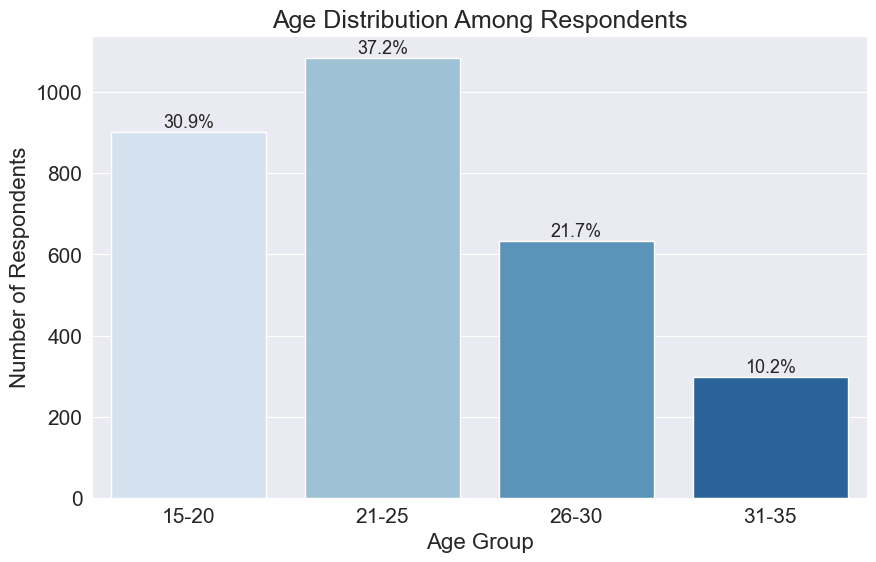

In [943]:
# Filter out 'Unknown' from the 'Age' column
df_age_cleaned = df[df['Age'] != 'Unknown']

# Ensure the 'Age' column is treated as an ordered categorical type
age_order = ['15-20', '21-25', '26-30', '31-35']
df_age_cleaned['Age'] = pd.Categorical(df_age_cleaned['Age'], categories=age_order, ordered=True)

# Plot the Age Distribution using a bar plot
plt.figure(figsize=(10, 6))
a = sns.countplot(data=df_age_cleaned, x='Age', palette='Blues')

age_counts = df_age_cleaned['Age'].value_counts().sort_index(ascending=True)

for i in range(len(df_age_cleaned['Age'].unique())):
    plt.text(a.get_xticks()[i], age_counts.values[i] + 10, f"{(age_counts.values[i]/df_age_cleaned.shape[0])*100:.1f}%" , ha='center', fontsize=13 ) 
    

# Customize the plot
plt.title('Age Distribution Among Respondents', fontsize=18)
plt.xlabel('Age Group',fontsize=16)
plt.ylabel('Number of Respondents', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('./images/age_distribution.png')

# Show the plot
plt.show()


##### Gender Representation: What is the proportion of male vs. female respondents? 

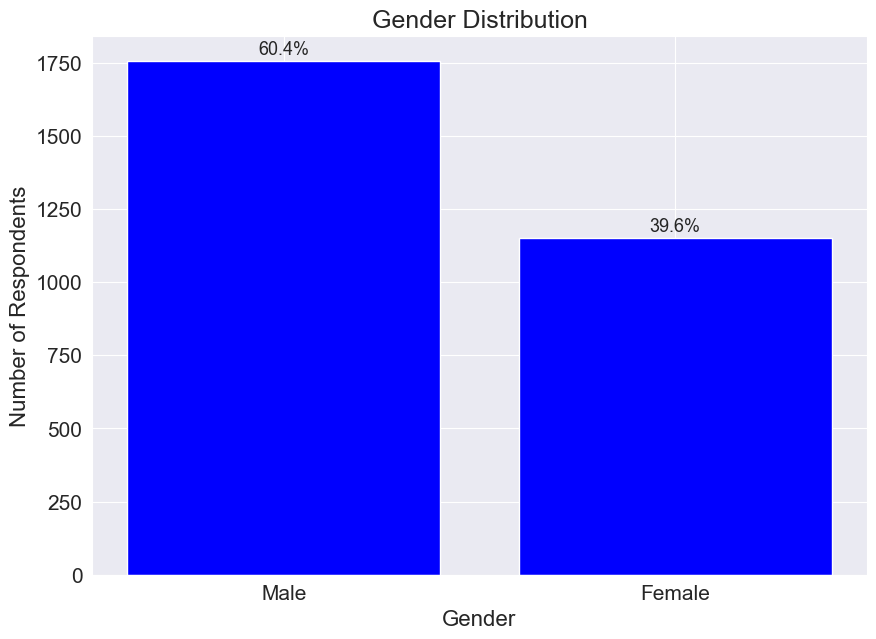

In [944]:
#  Remove rows where 'Gender' is 'Unknown'
df_cleaned = df[df['Gender'] != 'Unknown']

#  Count occurrences of each unique gender
gender_counts = df_cleaned['Gender'].value_counts()

#  Calculate percentage
total_count = gender_counts.sum()
gender_percentages = (gender_counts / total_count) * 100

#  Plot the distribution using a bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(gender_counts.index.astype(str), gender_counts.values, color='blue')

#  Add percentage labels on top of the bars
for bar, percentage in zip(bars, gender_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=13)

plt.xlabel('Gender', fontsize=16)
plt.ylabel('Number of Respondents',fontsize=16)
plt.title('Gender Distribution', fontsize=18)
plt.xticks(fontsize=15) # 360 means no rotation, so it can be 0
plt.yticks(fontsize=15)
plt.savefig('./images/gender_distribution.png')

plt.show()

####  Marital Status Trends: What is the breakdown of marital status in the dataset? How many respondents are single, married

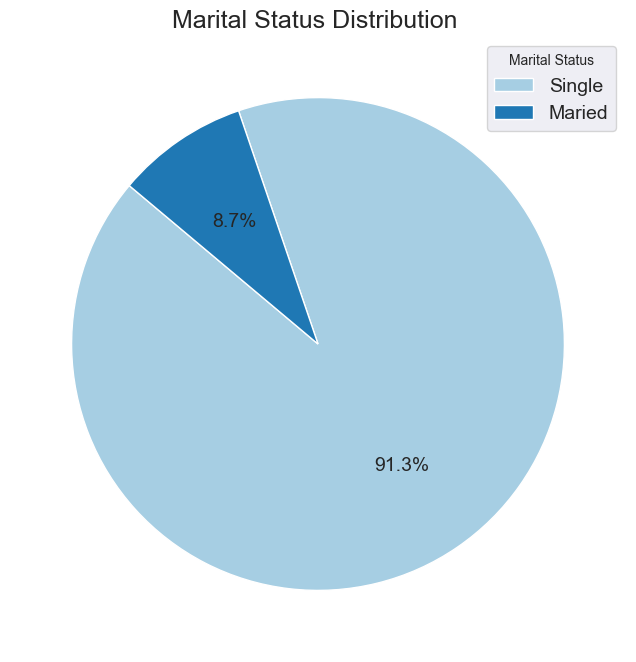

In [945]:
# 1. Remove rows where 'MaritalStatus' is 'Unknown'
df_cleaned = df[df['MaritalStatus'] != 'Unknown']

# 2. Count occurrences of each unique marital status
marital_counts = df_cleaned['MaritalStatus'].value_counts()

# 3. Plot the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    marital_counts, 
    labels=None, 
    autopct='%1.1f%%',  # Show percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors,  # Optional color scheme
    textprops={'fontsize': 14}
)

# 4. Add legend
plt.legend(marital_counts.index, title="Marital Status", loc="best", fontsize=14)

# 5. Add a title
plt.title('Marital Status Distribution ', fontsize=18)

plt.savefig('./images/marital_status_distribution.png')

plt.show()

Employment Status: What proportion of respondents are employed vs. unemployed? What are the main types of employment among respondents?

In [946]:
df['EmploymentStatus'].unique()

array(['Self-employed', nan, 'Unemployed', 'Employed'], dtype=object)

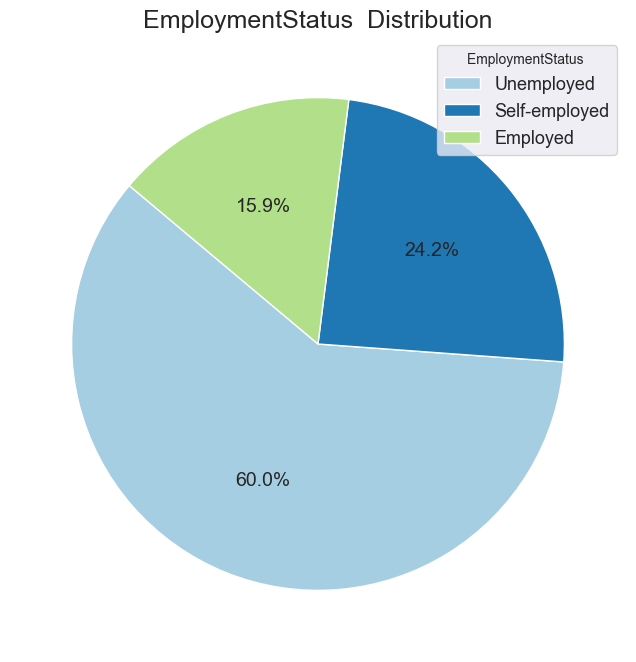

In [947]:
# 1. Remove rows where 'MaritalStatus' is 'Unknown'
df_cleaned = df[df['EmploymentStatus'] != 'nan']

# 2. Count occurrences of each unique marital status
marital_counts = df_cleaned['EmploymentStatus'].value_counts()

# 3. Plot the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    marital_counts, 
    labels=None, 
    autopct='%1.1f%%',  # Show percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors,  # Optional color scheme
    textprops={'fontsize': 14}
)

# 4. Add legend
plt.legend(marital_counts.index, title="EmploymentStatus ", loc="best", fontsize=13)

# 5. Add a title
plt.title('EmploymentStatus  Distribution', fontsize=18)

plt.savefig('./images/employment_status_distribution.png')

plt.show()

### Disability Prevalence: How many respondents report having a disability, and what types of disabilities are most common?

In [948]:
df['HasDisability'].unique()

array(['No', nan, 'Yes'], dtype=object)

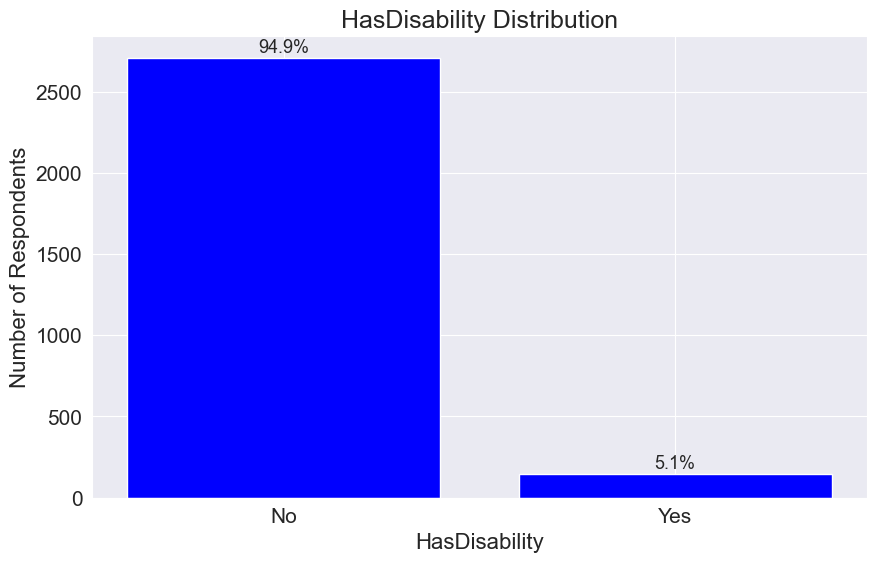

In [949]:
#  Remove rows where 'Gender' is 'Unknown'
df_cleaned = df[df['HasDisability'] != 'nan']

#  Count occurrences of each unique gender
gender_counts = df_cleaned['HasDisability'].value_counts()

#  Calculate percentage
total_count = gender_counts.sum()
gender_percentages = (gender_counts / total_count) * 100

#  Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_counts.index.astype(str), gender_counts.values, color='blue')

#  Add percentage labels on top of the bars
for bar, percentage in zip(bars, gender_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=13)

plt.xlabel('HasDisability', fontsize=16)
plt.ylabel('Number of Respondents', fontsize=16)
plt.title('HasDisability Distribution', fontsize=18)
plt.xticks(fontsize=15)  # 360 means no rotation, so it can be 0
plt.yticks(fontsize=15)

plt.savefig('./images/has_disability_distribution.png')

plt.show()

#### What kinds of disabilities are common?

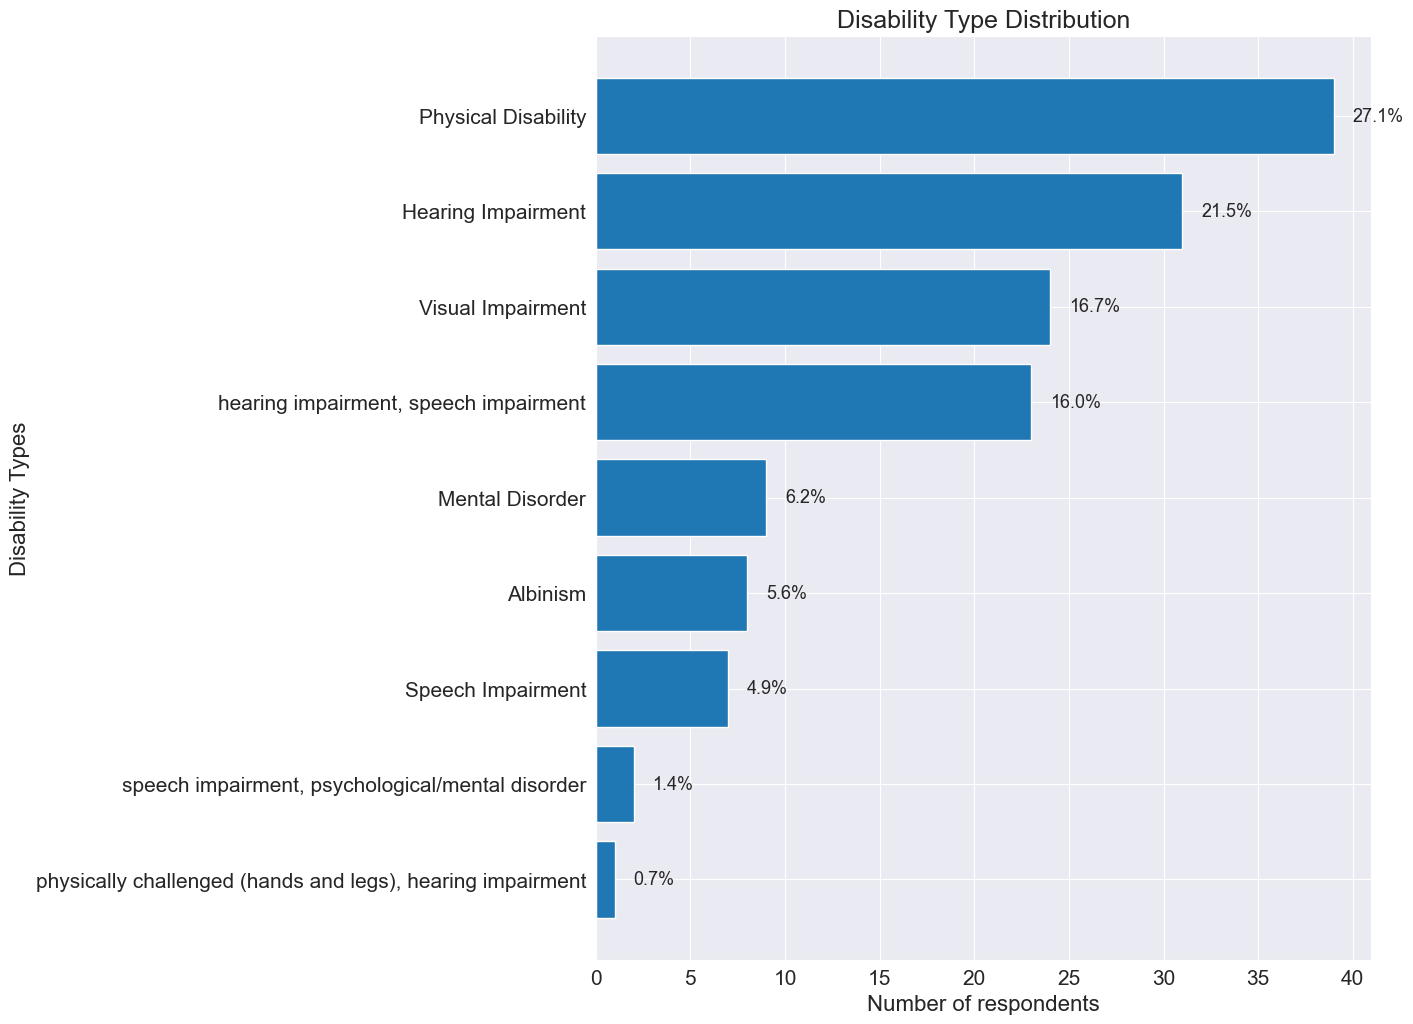

In [950]:
disability_filtered = df[df['DisabilityType'] != 'none']['DisabilityType']
disability_count = disability_filtered.value_counts(sort=True, ascending=True)

plt.figure(figsize=(10,12))
bars = plt.barh(disability_count.keys(), disability_count.values);
plt.xlabel('Number of respondents', fontsize=16);
plt.ylabel('Disability Types', fontsize=16);
plt.title('Disability Type Distribution', fontsize=18);
plt.xticks( fontsize=15);
plt.yticks(fontsize=15);

for i in range(len(bars)):
    
# for i in range(len(community_challenges_count.keys)):
    plt.text(
        bars[i].get_width() + 1,  # Position the text slightly right of the bar
        bars[i].get_y() + bars[i].get_height() / 2,  # Center the text vertically on the bar
        f'{(disability_count.values[i]/disability_filtered.shape[0])*100:.1f}%',  # Format as 1 decimal place percentage
        va='center',
        fontsize=13
    )
    
plt.savefig('./images/disability_types_distribution.png')

###  Residence Patterns: Which residential areas have the most and least representation among respondents?

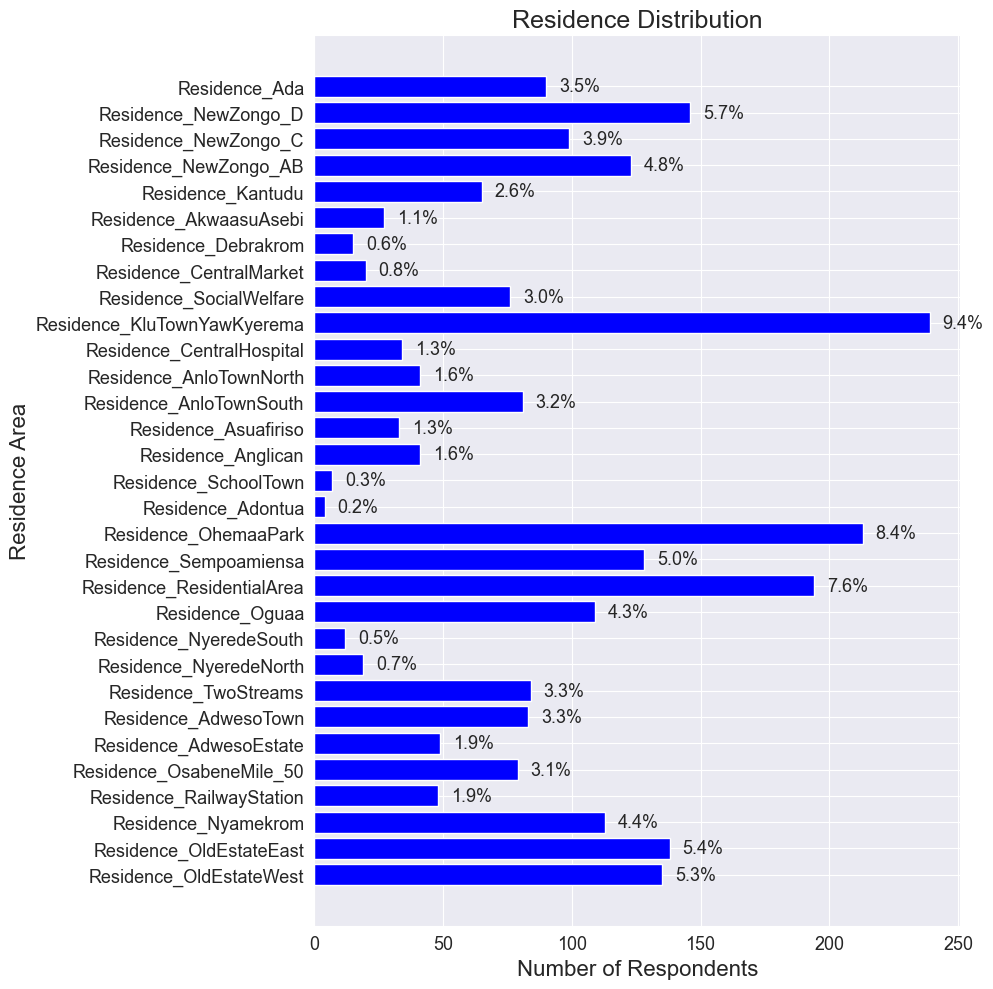

In [951]:
# 1. Extract the columns representing residence areas
residence_columns = [
    'Residence_OldEstateWest', 'Residence_OldEstateEast', 'Residence_Nyamekrom', 
    'Residence_RailwayStation', 'Residence_NsuakeoAbotanso', 'Residence Tanoso',
    'Residence Nsukwaoso', 'Residence_OsabeneMile_50', 'Residence_AdwesoEstate',
    'Residence_AdwesoTown', 'Residence_TwoStreams', 'Residence_NyeredeNorth',
    'Residence_NyeredeSouth', 'Residence_Oguaa', 'Residence_ResidentialArea',
    'Residence_Sempoamiensa', 'Residence_OhemaaPark', 'Residence_Adontua',
    'Residence_SchoolTown', 'Residence_Anglican', 'Residence_Asuafiriso',
    'Residence_AnloTownSouth', 'Residence_AnloTownNorth', 'Residence_CentralHospital',
    'Residence_KluTownYawKyerema', 'Residence_SocialWelfare', 'Residence_CentralMarket',
    'Residence_Debrakrom', 'Residence_AkwaasuAsebi', 'Residence_Kantudu',
    'Residence_NewZongo_AB', 'Residence_NewZongo_C', 'Residence_NewZongo_D', 'Residence_Ada'
]

# 2. Filter residence columns to include only those present in the DataFrame
residence_columns = [col for col in residence_columns if col in df.columns]

# 3. Count non-null values in each residence column
residence_counts = {col: df[col].notnull().sum() for col in residence_columns}

# 4. Convert counts to a DataFrame for easier plotting
residence_df = pd.DataFrame(list(residence_counts.items()), columns=['Residence Area', 'Count'])

# 5. Calculate percentage for each residence area
total_count = residence_df['Count'].sum()
residence_df['Percentage'] = (residence_df['Count'] / total_count) * 100

# 6. Plot the horizontal bar chart
plt.figure(figsize=(10, 10))
bars = plt.barh(residence_df['Residence Area'], residence_df['Count'], color='blue')

# 7. Add percentage labels on each bar
for bar, percentage in zip(bars, residence_df['Percentage']):
    plt.text(
        bar.get_width() + 5,  # Position the text slightly right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically on the bar
        f'{percentage:.1f}%',  # Format as 1 decimal place percentage
        va='center',
        fontsize=13
    )

plt.xlabel('Number of Respondents', fontsize=16)
plt.ylabel('Residence Area', fontsize=16)
plt.title('Residence Distribution', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()  # Adjust layout for better fitting

plt.savefig('./images/residence_distribution.png')

plt.show()

Community Engagement: What percentage of respondents participate in community activities, and which types of activities are most popular?


In [952]:
df['CommunityActivity'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

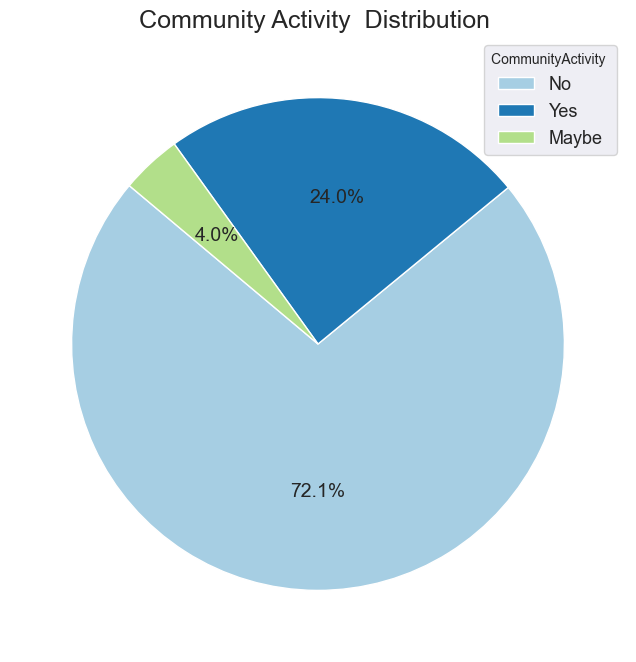

In [953]:
# 1. Remove rows where 'MaritalStatus' is 'Unknown'
df_cleaned = df[df['CommunityActivity'] != 'nan']

# 2. Count occurrences of each unique marital status
marital_counts = df_cleaned['CommunityActivity'].value_counts()

# 3. Plot the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    marital_counts, 
    labels=None, 
    autopct='%1.1f%%',  # Show percentage on slices
    startangle=140, 
    colors=plt.cm.Paired.colors,  # Optional color scheme
    textprops={'fontsize': 14}
)

# 4. Add legend
plt.legend(marital_counts.index, title="CommunityActivity ", loc="best", fontsize=13)



# 5. Add a title
plt.title('Community Activity  Distribution ', fontsize=18)

plt.savefig('./images/Community_activity_distribution.png')

plt.show()

 Health Insurance Access: How many respondents have health insurance? What proportion does not?


In [954]:
df['HasHealthInsurance'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

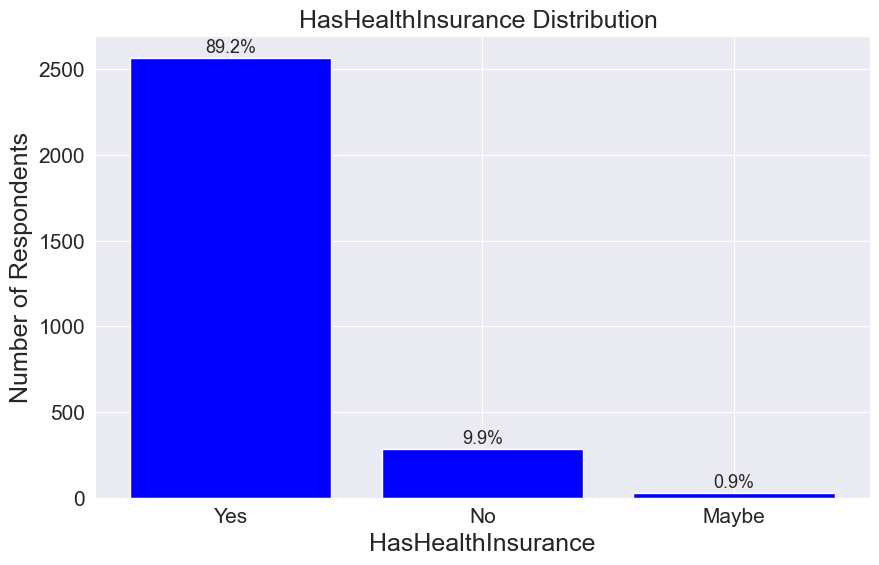

In [955]:
#  Remove rows where 'Gender' is 'Unknown'
df_cleaned = df[df['HasHealthInsurance'] != 'nan']

#  Count occurrences of each unique gender
gender_counts = df_cleaned['HasHealthInsurance'].value_counts()

#  Calculate percentage
total_count = gender_counts.sum()
gender_percentages = (gender_counts / total_count) * 100

#  Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_counts.index.astype(str), gender_counts.values, color='blue')

#  Add percentage labels on top of the bars
for bar, percentage in zip(bars, gender_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=13)

plt.xlabel('HasHealthInsurance', fontsize=18)
plt.ylabel('Number of Respondents', fontsize=18)
plt.title('HasHealthInsurance Distribution ', fontsize=18)
plt.xticks(fontsize=15)  # 360 means no rotation, so it can be 0
plt.yticks(fontsize=15)
plt.savefig('./images/has_insurance_distribution.png')

plt.show()

 Youth Activity Interest: What percentage of respondents express interest in youth activities?


In [956]:
df['YouthActivityInterest'].unique()

array([nan, 'Yes', 'No', 'Maybe'], dtype=object)

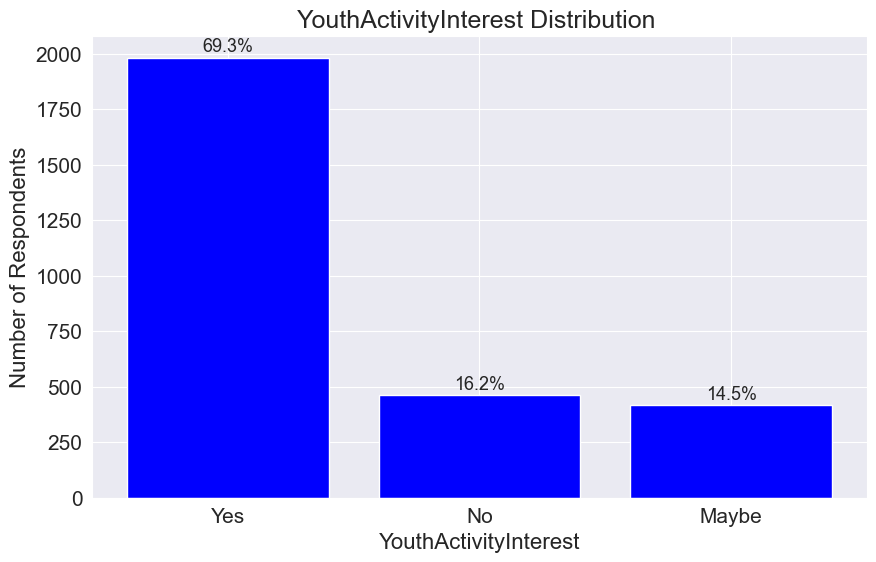

In [957]:
#  Remove rows where 'Gender' is 'Unknown'
df_cleaned = df[df['YouthActivityInterest'] != 'nan']

#  Count occurrences of each unique gender
gender_counts = df_cleaned['YouthActivityInterest'].value_counts()

#  Calculate percentage
total_count = gender_counts.sum()
gender_percentages = (gender_counts / total_count) * 100

#  Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(gender_counts.index.astype(str), gender_counts.values, color='blue')

#  Add percentage labels on top of the bars
for bar, percentage in zip(bars, gender_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=13)

plt.xlabel('YouthActivityInterest', fontsize=16)
plt.ylabel('Number of Respondents', fontsize=16)
plt.title('YouthActivityInterest Distribution ', fontsize=18)
plt.xticks(fontsize=15)  # 360 means no rotation, so it can be 0
plt.yticks(fontsize=15)
plt.savefig('./images/youth_activity_interest_distribution.png')

plt.show()

 Social Media Platforms: Which social media platforms are most popular among respondents (Facebook, Twitter, Instagram, etc.)?

In [958]:

df['SocialMediaPlatforms_Facebook'].unique()

array(['Facebook', 'unknown'], dtype=object)

In [959]:
df['SocialMediaPlatforms_Facebook'].unique()

array(['Facebook', 'unknown'], dtype=object)

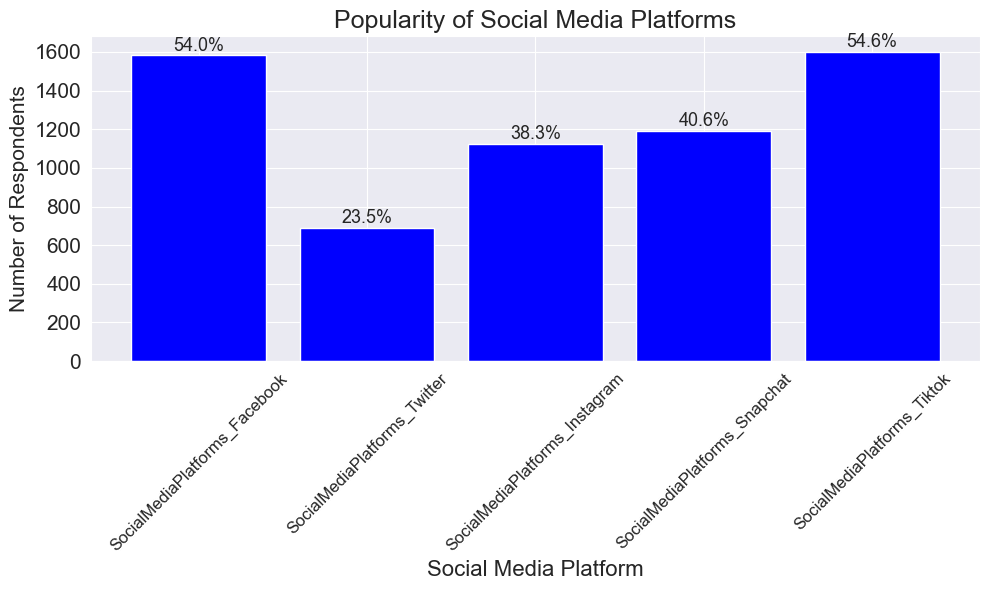

In [960]:
# Define social media platform columns
platform_columns = [
    'SocialMediaPlatforms_Facebook', 
    'SocialMediaPlatforms_Twitter', 
    'SocialMediaPlatforms_Instagram', 
    'SocialMediaPlatforms_Snapchat', 
    'SocialMediaPlatforms_Tiktok'
]

# Count non-null values for each platform
platform_counts = {col: df[df[col] != 'unknown'][col].count() for col in platform_columns}
total_count = len(df)  # Total number of respondents

# Convert counts to DataFrame for plotting
platform_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'Count'])

# Calculate percentages
platform_df['Percentage'] = (platform_df['Count'] / total_count) * 100

# Plot the distribution using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(platform_df['Platform'], platform_df['Count'], color='blue')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, platform_df['Percentage']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 5, 
        f'{percentage:.1f}%', ha='center', va='bottom', fontsize=13
    )

plt.xlabel('Social Media Platform', fontsize=16)
plt.ylabel('Number of Respondents',fontsize=15)
plt.title('Popularity of Social Media Platforms', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.savefig('./images/social_media_popularity_distribution.png')

plt.show()

### CommunityChallenges

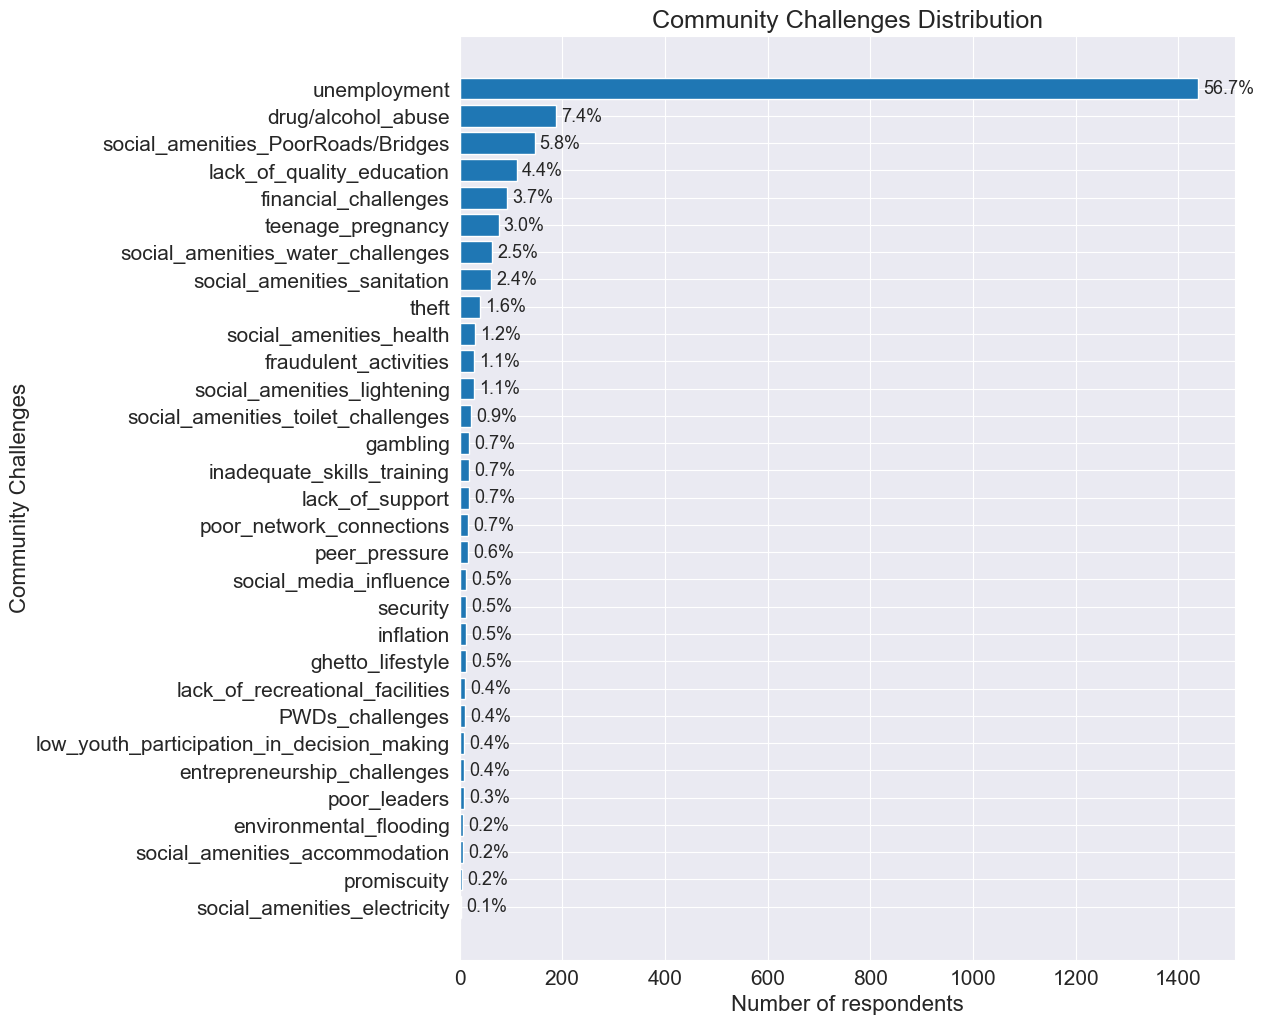

In [961]:
community_challenges_filtered = df[df['CommunityChallenges'] != 'unknown']['CommunityChallenges']
community_challenges_count = community_challenges_filtered.value_counts(sort=True, ascending=True)

plt.figure(figsize=(10,12))
bars = plt.barh(community_challenges_count.keys(), community_challenges_count.values);
plt.xlabel('Number of respondents', fontsize=16);
plt.ylabel('Community Challenges', fontsize=16);
plt.title('Community Challenges Distribution', fontsize=18);
plt.xticks( fontsize=15);
plt.yticks(fontsize=15);

for i in range(len(bars)):
    
# for i in range(len(community_challenges_count.keys)):
    plt.text(
        bars[i].get_width() + 10,  # Position the text slightly right of the bar
        bars[i].get_y() + bars[i].get_height() / 2,  # Center the text vertically on the bar
        f'{(community_challenges_count.values[i]/community_challenges_filtered.shape[0])*100:.1f}%',  # Format as 1 decimal place percentage
        va='center',
        fontsize=13
    )
    
plt.savefig('./images/community_challenges_distribution.png')



### DayLocation

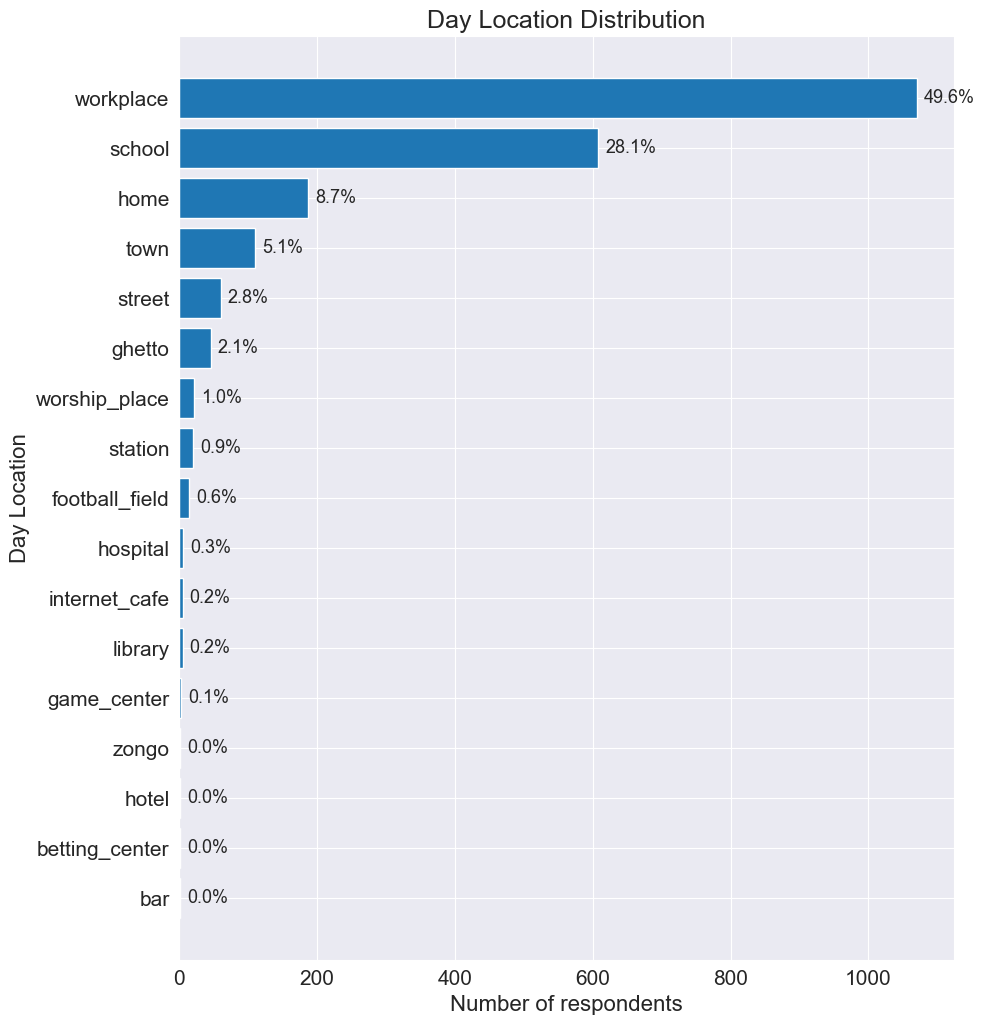

In [962]:
filtered_day_location = df[df['DayLocation'] != 'unknown']['DayLocation']
day_location_count = filtered_day_location.value_counts(sort=True, ascending=True)

plt.figure(figsize=(10,12))
bars = plt.barh(day_location_count.keys(), day_location_count.values);
plt.xlabel('Number of respondents', fontsize=16);
plt.ylabel('Day Location', fontsize=16);
plt.title('Day Location Distribution', fontsize=18);
plt.xticks( fontsize=15);
plt.yticks(fontsize=15);

for i in range(len(bars)):
    
# for i in range(len(community_challenges_count.keys)):
    plt.text(
        bars[i].get_width() + 10,  # Position the text slightly right of the bar
        bars[i].get_y() + bars[i].get_height() / 2,  # Center the text vertically on the bar
        f'{(day_location_count.values[i]/filtered_day_location.shape[0])*100:.1f}%',  # Format as 1 decimal place percentage
        va='center',
        fontsize=13
    )
    
plt.savefig('./images/day_location_distribution.png')

### NightLocation

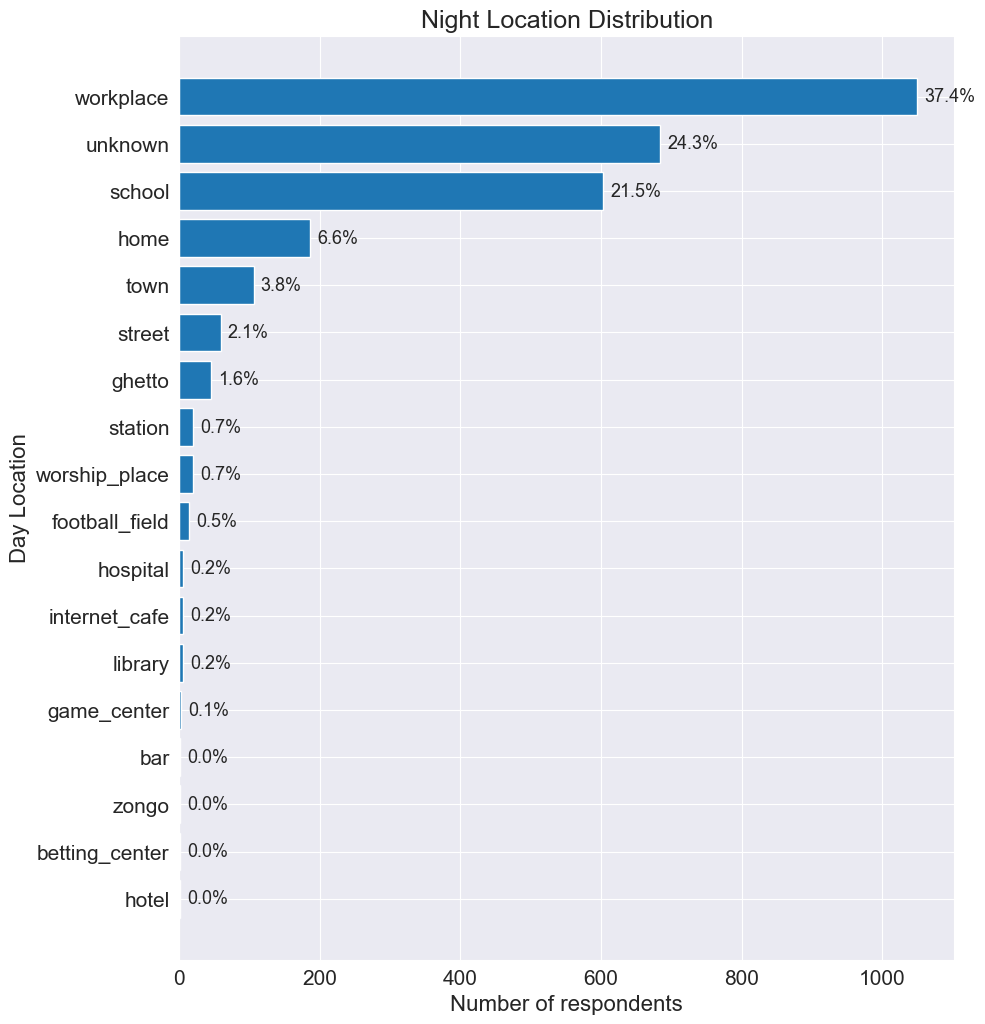

In [ ]:
filtered_night_location = df[df['NightLocation'] != 'unknown']['DayLocation']
night_location_count = filtered_night_location.value_counts(sort=True, ascending=True)

plt.figure(figsize=(10,12))
bars = plt.barh(night_location_count.keys(), night_location_count.values);
plt.xlabel('Number of respondents', fontsize=16);
plt.ylabel('Day Location', fontsize=16);
plt.title('Night Location Distribution', fontsize=18);
plt.xticks( fontsize=15);
plt.yticks(fontsize=15);

for i in range(len(bars)):
    plt.text(
        bars[i].get_width() + 10,  # Position the text slightly right of the bar
        bars[i].get_y() + bars[i].get_height() / 2,  # Center the text vertically on the bar
        f'{(night_location_count.values[i]/filtered_night_location.shape[0])*100:.1f}%',  # Format as 1 decimal place percentage
        va='center',
        fontsize=13
    )
    
plt.savefig('./images/night_location_distribution.png')

### Ghettho, Street and Zongo Youth (DayLocation)

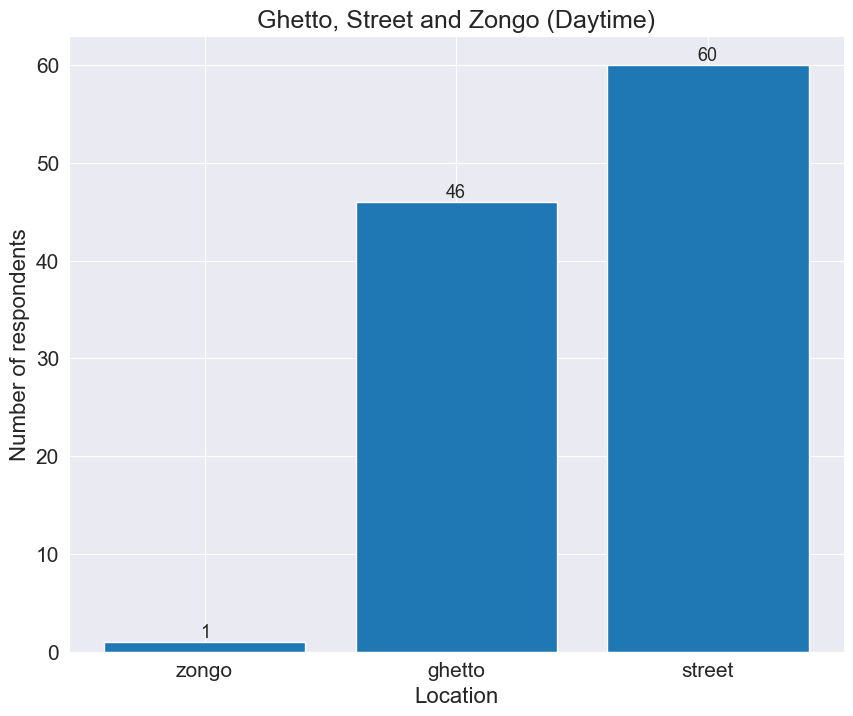

In [988]:
filtered_areas_location_daytime = df[(df['DayLocation'] == 'ghetto') | (df['DayLocation'] == 'zongo') | (df['DayLocation'] == 'street')]['DayLocation']
areas_location_count_daytime = filtered_areas_location_daytime.value_counts(sort=True, ascending=True)

plt.figure(figsize=(10,8))
bars = plt.bar(areas_location_count_daytime.keys(), areas_location_count_daytime.values);
plt.ylabel('Number of respondents', fontsize=16);
plt.xlabel('Location', fontsize=16);
plt.title('Ghetto, Street and Zongo (Daytime)', fontsize=18);
plt.xticks( fontsize=15);
plt.yticks(fontsize=15);

for i in range(len(bars)):
    plt.text(
        bars[i].get_x() + bars[i].get_width() / 2,  # Position the text slightly right of the bar
        bars[i].get_height() + 0.5,  # Center the text vertically on the bar
        f'{areas_location_count_daytime.values[i]}',
        ha='center',
        fontsize=13
    )
    
plt.savefig('./images/daytime_zgs_distribution.png')
# filtered_areas_location['DayLocation']

### Ghettho, Street and Zongo Youth (NightLocation)

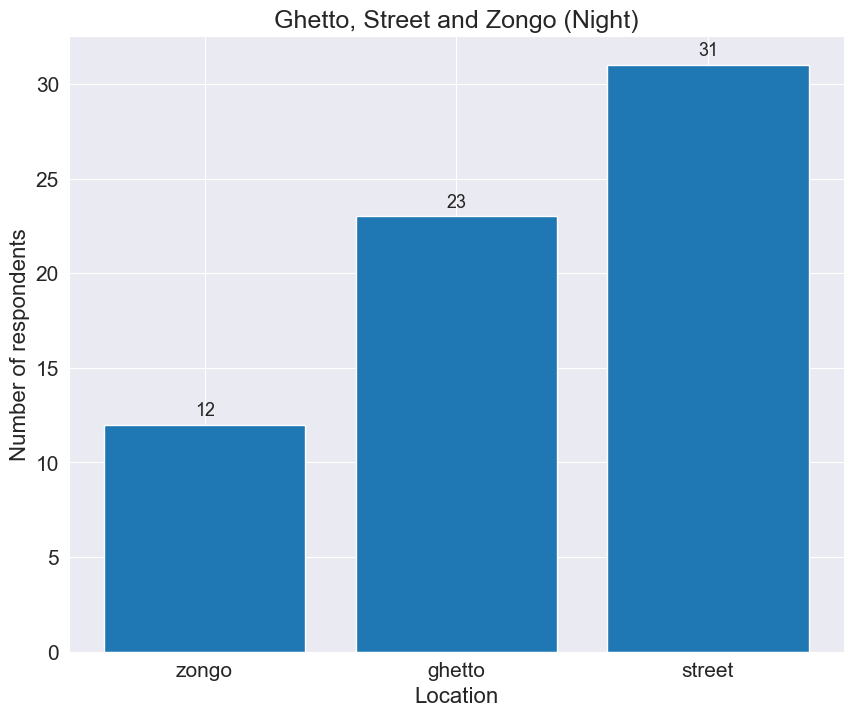

In [998]:
filtered_areas_location_nighttime = df[(df['NightLocation'] == 'ghetto') | (df['NightLocation'] == 'zongo') | (df['NightLocation'] == 'street')]['NightLocation']
areas_location_count_nighttime = filtered_areas_location_nighttime.value_counts(sort=True, ascending=True)

plt.figure(figsize=(10,8))
bars = plt.bar(areas_location_count_nighttime.keys(), areas_location_count_nighttime.values);
plt.ylabel('Number of respondents', fontsize=16);
plt.xlabel('Location', fontsize=16);
plt.title('Ghetto, Street and Zongo (Night)', fontsize=18);
plt.xticks( fontsize=15);
plt.yticks(fontsize=15);

for i in range(len(bars)):
    plt.text(
        bars[i].get_x() + bars[i].get_width() / 2,  # Position the text slightly right of the bar
        bars[i].get_height() + 0.5,  # Center the text vertically on the bar
        f'{areas_location_count_nighttime.values[i]}',
        ha='center',
        fontsize=13
    )
    
plt.savefig('./images/nighttime_zgs_distribution.png')


## Bivariate 

1. Age vs. Employment Status: How does employment status vary by age group? Are younger respondents more likely to be unemployed or employed in certain types of jobs?
2. Gender vs. Education Level: Is there a difference in education level distribution between male and female respondents?
3. Marital Status vs. HasChildren: Is there a relationship between marital status and the likelihood of having children?
4. Community Participation vs. Education Level: Are people with higher education levels more or less likely to participate in community activities?
5. Disability vs. Employment Status: Does having a disability affect employment status?
6. Town Hall Participation vs. PlanToVote: Are respondents who participate in town hall meetings more likely to plan to vote?
7. CommunityChallenges vs. Residence: Do community challenges reported by respondents vary significantly between different residential areas?
8. Social Media Usage vs. Age: How does the use of social media platforms vary across different age groups?
9.SourceOfKofkroInfo vs. Employment Status: Do employed and unemployed respondents obtain information about Kofkro differently?
10. FutureFollowupInterest vs. Age: Are younger or older respondents more interested in future follow-up on the project?

#### 1. Age vs. Employment Status: How does employment status vary by age group? Are younger respondents more likely to be unemployed or employed in

In [ ]:
df['EmploymentStatus'].unique()

array(['Self-employed', nan, 'Unemployed', 'Employed'], dtype=object)

In [ ]:
df['Age'].unique()

array(['31-35', 'Unknown', '15-20', '21-25', '26-30'], dtype=object)

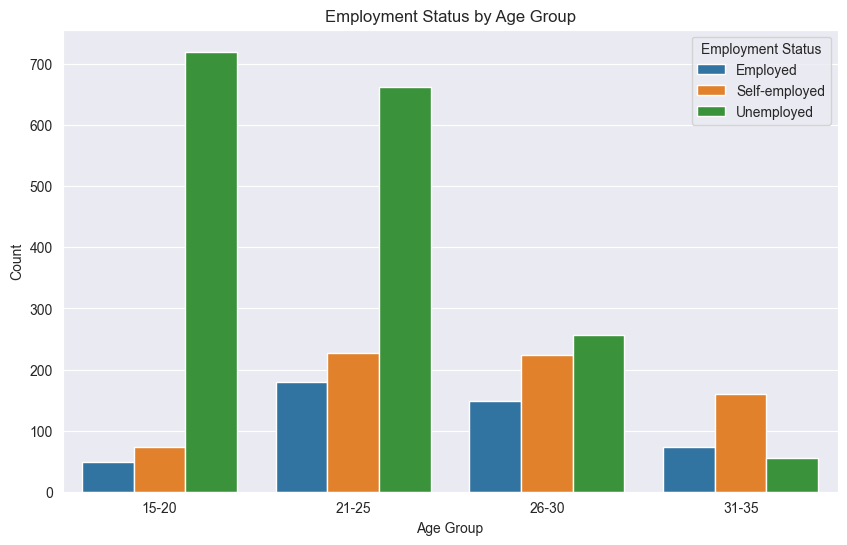

In [ ]:
# Group by 'Age' and 'EmploymentStatus', and count occurrences
employment_by_age = df.groupby(['Age', 'EmploymentStatus']).size().reset_index(name='Count')

# Filter out the 'Unknown' age group (if needed)
employment_by_age = employment_by_age[employment_by_age['Age'] != 'Unknown']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=employment_by_age, x='Age', y='Count', hue='EmploymentStatus', dodge=True)

# Customize the plot
plt.title('Employment Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Employment Status', loc='upper right')

# Show the plot
plt.show()

### 2. Gender vs. Education Level: Is there a difference in education level distribution between male and female respondents?

In [ ]:
df['CurrentEducationLevel'].unique()

array([nan, 'SHS', 'TERTIARY', 'TVET', 'JHS'], dtype=object)

In [ ]:
df['HighestEducationLevel'].unique()

array(['TERTIARY', nan, 'JHS', 'SHS', 'TVET'], dtype=object)

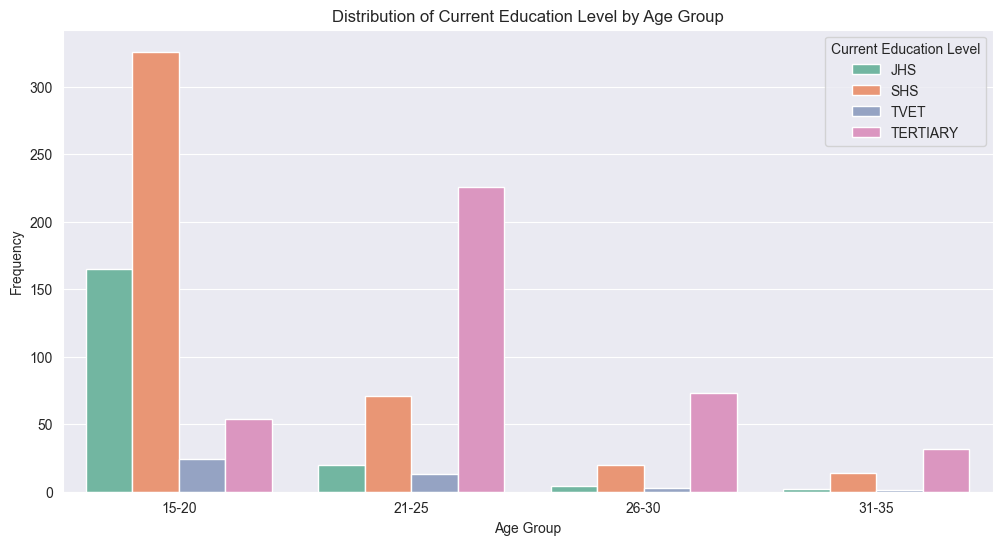

In [ ]:
 #Filter out NaN values in 'CurrentEducationLevel'
df_education_age = df.dropna(subset=['CurrentEducationLevel'])

# Define the order for 'Age' and 'CurrentEducationLevel' categories
age_order = ['15-20', '21-25', '26-30', '31-35']
education_order = ['JHS', 'SHS', 'TVET', 'TERTIARY']

# Convert 'Age' and 'CurrentEducationLevel' columns to ordered categorical types
df_education_age['Age'] = pd.Categorical(df_education_age['Age'], categories=age_order, ordered=True)
df_education_age['CurrentEducationLevel'] = pd.Categorical(df_education_age['CurrentEducationLevel'], categories=education_order, ordered=True)

# Group by 'Age' and 'CurrentEducationLevel', and count the occurrences
education_by_age = df_education_age.groupby(['Age', 'CurrentEducationLevel']).size().reset_index(name='Count')

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=education_by_age, x='Age', y='Count', hue='CurrentEducationLevel', palette='Set2')

# Customize the plot
plt.title('Distribution of Current Education Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Current Education Level', loc='upper right')

# Show the plot
plt.show()

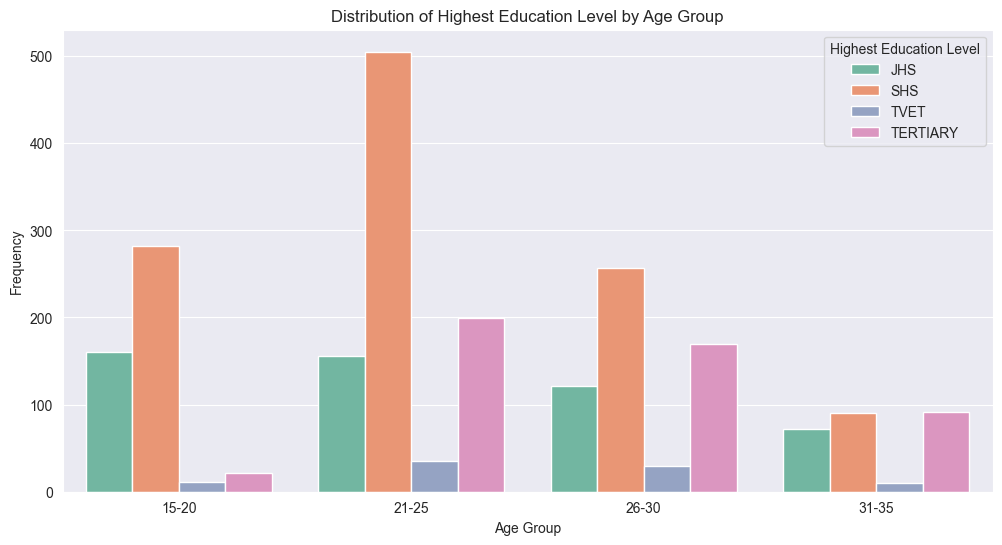

In [ ]:
 #Filter out NaN values in 'CurrentEducationLevel'
df_education_age = df.dropna(subset=['HighestEducationLevel'])

# Define the order for 'Age' and 'CurrentEducationLevel' categories
age_order = ['15-20', '21-25', '26-30', '31-35']
education_order = ['JHS', 'SHS', 'TVET', 'TERTIARY']

# Convert 'Age' and 'CurrentEducationLevel' columns to ordered categorical types
df_education_age['Age'] = pd.Categorical(df_education_age['Age'], categories=age_order, ordered=True)
df_education_age['HighestEducationLevel'] = pd.Categorical(df_education_age['HighestEducationLevel'], categories=education_order, ordered=True)

# Group by 'Age' and 'CurrentEducationLevel', and count the occurrences
education_by_age = df_education_age.groupby(['Age', 'HighestEducationLevel']).size().reset_index(name='Count')

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=education_by_age, x='Age', y='Count', hue='HighestEducationLevel', palette='Set2')

# Customize the plot
plt.title('Distribution of Highest Education Level by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Highest Education Level', loc='upper right')

# Show the plot
plt.show()

#### 3. Marital Status vs. HasChildren: Is there a relationship between marital status and the likelihood of having children?

In [ ]:
df['MaritalStatus'].unique()

array(['Maried', nan, 'Single'], dtype=object)

In [ ]:
df['HasChildren'].unique()

array(['Yes', nan, 'No'], dtype=object)

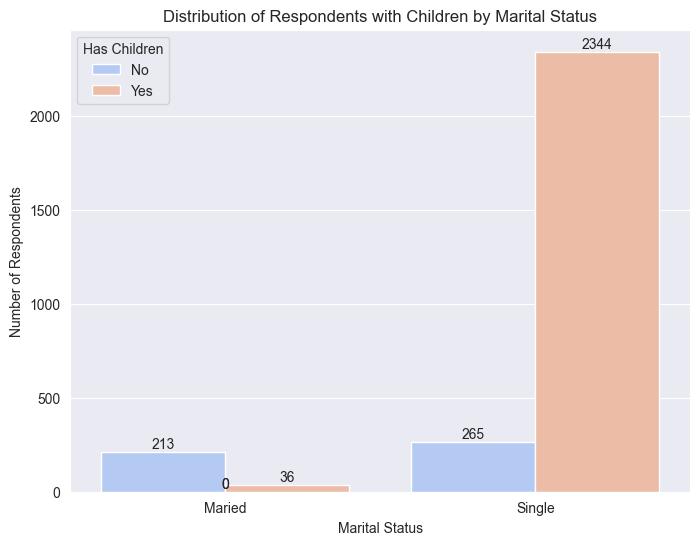

In [ ]:
# Drop rows with NaN in 'MaritalStatus' or 'HasChildren' if they are not relevant
df_filtered = df.dropna(subset=['MaritalStatus', 'HasChildren'])

# Define the order for 'MaritalStatus' categories
marital_order = ['Maried', 'Single']
df_filtered['MaritalStatus'] = pd.Categorical(df_filtered['MaritalStatus'], categories=marital_order, ordered=True)

# Plot the grouped bar chart
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_filtered, x='MaritalStatus', hue='HasChildren', palette='coolwarm')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar (count value)
    ax.text(
        p.get_x() + p.get_width() / 2, height + 1,  # Position the text at the center of the bar
        f'{int(height)}',  # Display the count as an integer
        ha='center', va='bottom'
    )

# Customize the plot
plt.title('Distribution of Respondents with Children by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Has Children', labels=['No', 'Yes'])

# Show the plot
plt.show()

#### 4. Community Participation vs. Education Level: Are people with higher education levels more or less likely to participate in community activities?

In [ ]:
df['CommunityActivity'].unique()

array(['Yes', nan, 'No', 'Maybe'], dtype=object)

In [ ]:
df['EducationStatus'].unique()

array(['Currently attending', nan, 'Attended school in the past',
       'Never attended school'], dtype=object)

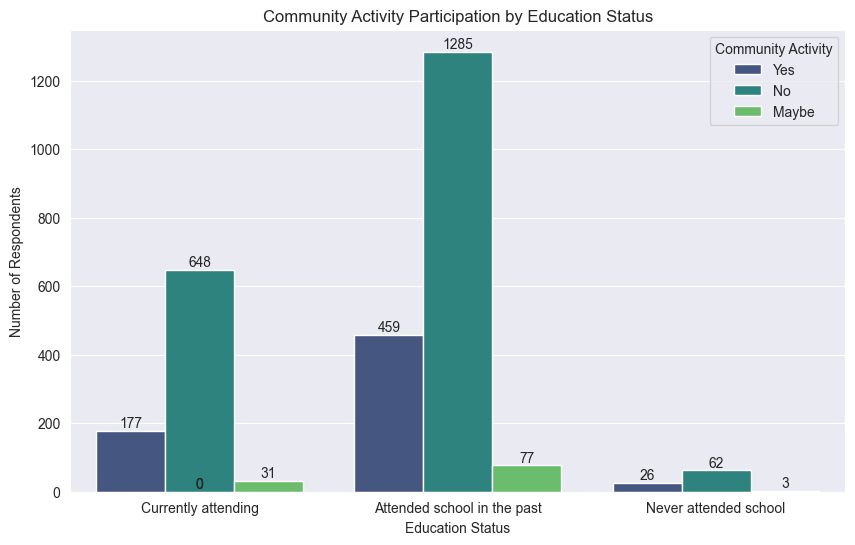

In [ ]:
# Drop rows with NaN in 'CommunityActivity' or 'EducationStatus' if they are not relevant
df_filtered = df.dropna(subset=['CommunityActivity', 'EducationStatus'])

# Define the order for 'CommunityActivity' and 'EducationStatus' categories
community_order = ['Yes', 'No', 'Maybe']
education_order = ['Currently attending', 'Attended school in the past', 'Never attended school']

# Convert 'CommunityActivity' and 'EducationStatus' to ordered categorical types
df_filtered['CommunityActivity'] = pd.Categorical(df_filtered['CommunityActivity'], categories=community_order, ordered=True)
df_filtered['EducationStatus'] = pd.Categorical(df_filtered['EducationStatus'], categories=education_order, ordered=True)

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtered, x='EducationStatus', hue='CommunityActivity', palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    height = p.get_height()  # Get the height of the bar (count value)
    ax.text(
        p.get_x() + p.get_width() / 2, height + 1,  # Position the text at the center of the bar
        f'{int(height)}',  # Display the count as an integer
        ha='center', va='bottom'
    )

# Customize the plot
plt.title('Community Activity Participation by Education Status')
plt.xlabel('Education Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Community Activity', loc='upper right')

# Show the plot
plt.show()

#### 5. Disability vs. Employment Status: Does having a disability affect employment status?


#### 6. Town Hall Participation vs. PlanToVote: Are respondents who participate in town hall meetings more likely to plan to vote?


#### 7. CommunityChallenges vs. Residence: Do community challenges reported by respondents vary significantly between different residential areas?


#### 8. Social Media Usage vs. Age: How does the use of social media platforms vary across different age groups?


#### 9.SourceOfKofkroInfo vs. Employment Status: Do employed and unemployed respondents obtain information about Kofkro differently?


#### 10. FutureFollowupInterest vs. Age: Are younger or older respondents more interested in future follow-up on the project?